In [100]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import scale 

from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [101]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.head(5)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [102]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [104]:
df.duplicated().sum()

0

In [105]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

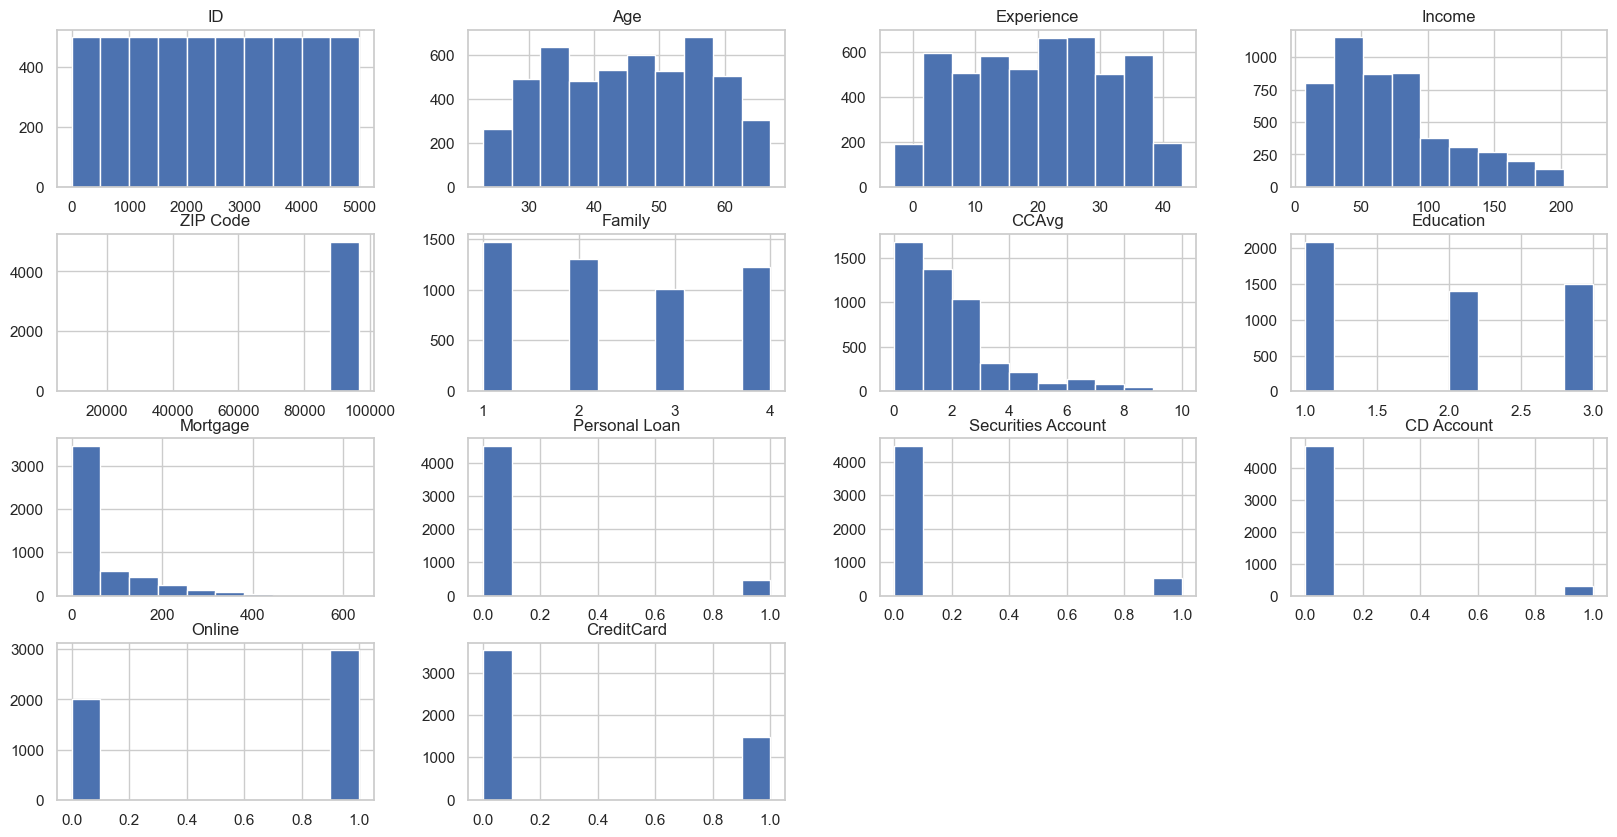

In [106]:
plt.rcParams["figure.figsize"] = (20,10)
df.hist();

#### Outlier Analysis

In [107]:
import plotly.express as px
px.box(df.drop(['ID','ZIP Code'],axis=1)).show()

###### Outliers in  Income

In [108]:
i='Income'

Q1 = df[i].quantile(0.25)
Q3 = df[i].quantile(0.75)
IQR = Q3 - Q1          
outliers =df[(df[i] < (Q1 - 1.5 * IQR)) | (df[i] > (Q3 + 1.5 * IQR))]
print(i,'outliers Count:',outliers.shape[0])

outliers

Income outliers Count: 96


ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
18      19   46          21     193     91604       2   8.10          3   
47      48   37          12     194     91380       4   0.20          3   
53      54   50          26     190     90245       3   2.10          3   
59      60   31           5     188     91320       2   4.50          1   
303    304   49          25     195     95605       4   3.00          1   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4659  4660   28           4     199     92121       1   6.33          1   
4670  4671   52          26     194     94305       1   1.70          1   
4895  4896   45          20     201     92120       2   2.80          1   
4981  4982   34           9     195     90266       2   3.00          1   
4993  4994   45          21     218     91801       2   6.67          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
18           0              1                   0           0       0   
47         211              1                   1           1       1   
53         240              1                   0           0       1   
59         455              0                   0           0       0   
303        617              1                   0           0       0   
...        ...            ...                 ...         ...     ...   
4659         0              0                   0           0       0   
4670         0              0                   0           0       1   
4895         0              0                   0           0       1   
4981       122              0                   0           0       1   
4993         0              0                   0           0       1   

      CreditCard  
18             0  
47             1  
53             0  
59             0  
303            0  
...          ...  
4659           0  
4670           0  
4895           1  
4981           0  
4993           0  

[96 rows x 14 columns]

In [109]:
# distribution of the income in the main dataframe
px.scatter(df,x='Income',trendline="ols")

In [110]:
# distribution of the income in the outlier dataframe
px.scatter(outliers,x='Income',trendline="ols")

Line has shifted towards the two points. Remove them.

In [111]:
df.shape

(5000, 14)

In [112]:
#After analyzing for outliers, these 2 observations are deleted (In Income Var)
df.drop(labels=[3896, 4993],axis=0,inplace=True)

In [113]:
df.shape

(4998, 14)

###### Outliers in  CCAvg

In [114]:
i = 'CCAvg'

Q1 = df[i].quantile(0.25)
Q3 = df[i].quantile(0.75)
IQR = Q3 - Q1          
outliers =df[(df[i] < (Q1 - 1.5 * IQR)) | (df[i] > (Q3 + 1.5 * IQR))]
print(i,'outliers Count:',outliers.shape[0])

outliers

CCAvg outliers Count: 322


ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
9       10   34           9     180     93023       1    8.9          3   
18      19   46          21     193     91604       2    8.1          3   
44      45   46          20     104     94065       1    5.7          1   
55      56   41          17     139     94022       2    8.0          1   
61      62   47          21     125     93407       1    5.7          1   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4888  4889   25           1     121     93106       1    5.4          1   
4908  4909   40          16     138     92121       2    6.1          1   
4911  4912   46          22     153     94539       2    7.5          1   
4937  4938   33           8     162     94960       1    8.6          1   
4980  4981   29           5     135     95762       3    5.3          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
9            0              1                   0           0       0   
18           0              1                   0           0       0   
44           0              0                   0           0       1   
55           0              0                   0           0       1   
61         112              0                   1           0       0   
...        ...            ...                 ...         ...     ...   
4888       158              0                   0           0       1   
4908         0              0                   0           0       1   
4911         0              0                   0           0       0   
4937         0              0                   0           1       1   
4980         0              1                   0           1       1   

      CreditCard  
9              0  
18             0  
44             1  
55             0  
61             0  
...          ...  
4888           0  
4908           0  
4911           0  
4937           1  
4980           1  

[322 rows x 14 columns]

In [115]:
# distribution of the CCAvg in the main dataframe
px.scatter(df,x='CCAvg',trendline="ols")

In [116]:
# distribution of the CCAvg in the outliers dataframe
px.scatter(outliers,x='CCAvg',trendline="ols")

No need to Remove outliers

###### Outliers in  mortgage

In [117]:
i='Mortgage'

Q1 = df[i].quantile(0.25)
Q3 = df[i].quantile(0.75)
IQR = Q3 - Q1          
outliers =df[(df[i] < (Q1 - 1.5 * IQR)) | (df[i] > (Q3 + 1.5 * IQR))]
print(i,'outliers Count:',outliers.shape[0])

outliers

Mortgage outliers Count: 291


ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
22      23   29           5      62     90277       1    1.2          1   
39      40   38          13      80     94115       4    0.7          3   
42      43   32           7     132     90019       4    1.1          2   
59      60   31           5     188     91320       2    4.5          1   
66      67   62          36     105     95670       2    2.8          1   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4859  4860   34           8     165     91107       1    7.0          3   
4865  4866   50          24     133     90025       4    1.4          2   
4899  4900   54          29      85     94928       4    1.3          3   
4942  4943   52          26     109     94710       1    2.4          1   
4963  4964   32           6      98     95054       2    4.5          3   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
22         260              0                   0           0       1   
39         285              0                   0           0       1   
42         412              1                   0           0       1   
59         455              0                   0           0       0   
66         336              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4859       541              1                   0           0       0   
4865       342              1                   0           0       0   
4899       299              0                   0           0       1   
4942       308              0                   0           1       1   
4963       306              0                   0           0       0   

      CreditCard  
22             0  
39             0  
42             0  
59             0  
66             0  
...          ...  
4859           0  
4865           1  
4899           0  
4942           1  
4963           0  

[291 rows x 14 columns]

In [118]:
# distribution of the Mortgage in the main dataframe
px.scatter(df,x='Mortgage',trendline="ols")

In [119]:
# distribution of the Mortgage in the outliers dataframe
px.scatter(outliers,x='Mortgage',trendline="ols")

##### Creating dummy variables

In [120]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [121]:
dummy_col = ['Securities Account',
       'CD Account', 'Online', 'CreditCard']
df2 =pd.get_dummies(data = df, columns = dummy_col)

In [122]:
df2.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account_0  Securities Account_1  CD Account_0  \
0              0                     0                     1             1   
1              0                     0                     1             1   
2              0                     1                     0             1   
3              0                     1                     0             1   
4              0                     1                     0             1   

   CD Account_1  Online_0  Online_1  CreditCard_0  CreditCard_1  
0             0         1         0             1             0  
1             0         1         0             1             0  
2             0         1         0             1             0  
3             0         1         0             1             0  
4             0         1         0             0             1

In [123]:
df['Education'].unique()

array([1, 2, 3], dtype=int64)

In [124]:
df2['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

In [125]:
df2.query('Experience < 0')

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
89      90   25          -1     113     94303       4   2.30          3   
226    227   24          -1      39     94085       2   1.70          2   
315    316   24          -2      51     90630       3   0.30          3   
451    452   28          -2      48     94132       2   1.75          3   
524    525   24          -1      75     93014       4   0.20          1   
536    537   25          -1      43     92173       3   2.40          2   
540    541   25          -1     109     94010       4   2.30          3   
576    577   25          -1      48     92870       3   0.30          3   
583    584   24          -1      38     95045       2   1.70          2   
597    598   24          -2     125     92835       2   7.20          1   
649    650   25          -1      82     92677       4   2.10          3   
670    671   23          -1      61     92374       4   2.60          1   
686    687   24          -1      38     92612       4   0.60          2   
793    794   24          -2     150     94720       2   2.00          1   
889    890   24          -2      82     91103       2   1.60          3   
909    910   23          -1     149     91709       1   6.33          1   
1173  1174   24          -1      35     94305       2   1.70          2   
1428  1429   25          -1      21     94583       4   0.40          1   
1522  1523   25          -1     101     94720       4   2.30          3   
1905  1906   25          -1     112     92507       2   2.00          1   
2102  2103   25          -1      81     92647       2   1.60          3   
2430  2431   23          -1      73     92120       4   2.60          1   
2466  2467   24          -2      80     94105       2   1.60          3   
2545  2546   25          -1      39     94720       3   2.40          2   
2618  2619   23          -3      55     92704       3   2.40          2   
2717  2718   23          -2      45     95422       4   0.60          2   
2848  2849   24          -1      78     94720       2   1.80          2   
2876  2877   24          -2      80     91107       2   1.60          3   
2962  2963   23          -2      81     91711       2   1.80          2   
2980  2981   25          -1      53     94305       3   2.40          2   
3076  3077   29          -1      62     92672       2   1.75          3   
3130  3131   23          -2      82     92152       2   1.80          2   
3157  3158   23          -1      13     94720       4   1.00          1   
3279  3280   26          -1      44     94901       1   2.00          2   
3284  3285   25          -1     101     95819       4   2.10          3   
3292  3293   25          -1      13     95616       4   0.40          1   
3394  3395   25          -1     113     90089       4   2.10          3   
3425  3426   23          -1      12     91605       4   1.00          1   
3626  3627   24          -3      28     90089       4   1.00          3   
3796  3797   24          -2      50     94920       3   2.40          2   
3824  3825   23          -1      12     95064       4   1.00          1   
3887  3888   24          -2     118     92634       2   7.20          1   
3946  3947   25          -1      40     93117       3   2.40          2   
4015  4016   25          -1     139     93106       2   2.00          1   
4088  4089   29          -1      71     94801       2   1.75          3   
4116  4117   24          -2     135     90065       2   7.20          1   
4285  4286   23          -3     149     93555       2   7.20          1   
4411  4412   23          -2      75     90291       2   1.80          2   
4481  4482   25          -2      35     95045       4   1.00          3   
4514  4515   24          -3      41     91768       4   1.00          3   
4582  4583   25          -1      69     92691       3   0.30          3   
4957  4958   29          -1      50     95842       2   1.75          3   

      Mortgage  Personal Loan  S

In [126]:
#Convert Negative Values in Experience into Positive
df2['Experience']=df2['Experience'].apply(lambda x :abs(x))

##### label encoding for ordinal variable

In [127]:
label_encoder = LabelEncoder()
df2['Education_encoded'] = label_encoder.fit_transform(df2['Education'])
df2 = df2.drop('Education', axis = 1)
df2.head(5)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Mortgage  \
0   1   25           1      49     91107       4    1.6         0   
1   2   45          19      34     90089       3    1.5         0   
2   3   39          15      11     94720       1    1.0         0   
3   4   35           9     100     94112       1    2.7         0   
4   5   35           8      45     91330       4    1.0         0   

   Personal Loan  Securities Account_0  Securities Account_1  CD Account_0  \
0              0                     0                     1             1   
1              0                     0                     1             1   
2              0                     1                     0             1   
3              0                     1                     0             1   
4              0                     1                     0             1   

   CD Account_1  Online_0  Online_1  CreditCard_0  CreditCard_1  \
0             0         1         0             1             0   
1             0         1         0             1             0   
2             0         1         0             1             0   
3             0         1         0             1             0   
4             0         1         0             0             1   

   Education_encoded  
0                  0  
1                  0  
2                  0  
3                  1  
4                  1

### Descriptive analysis

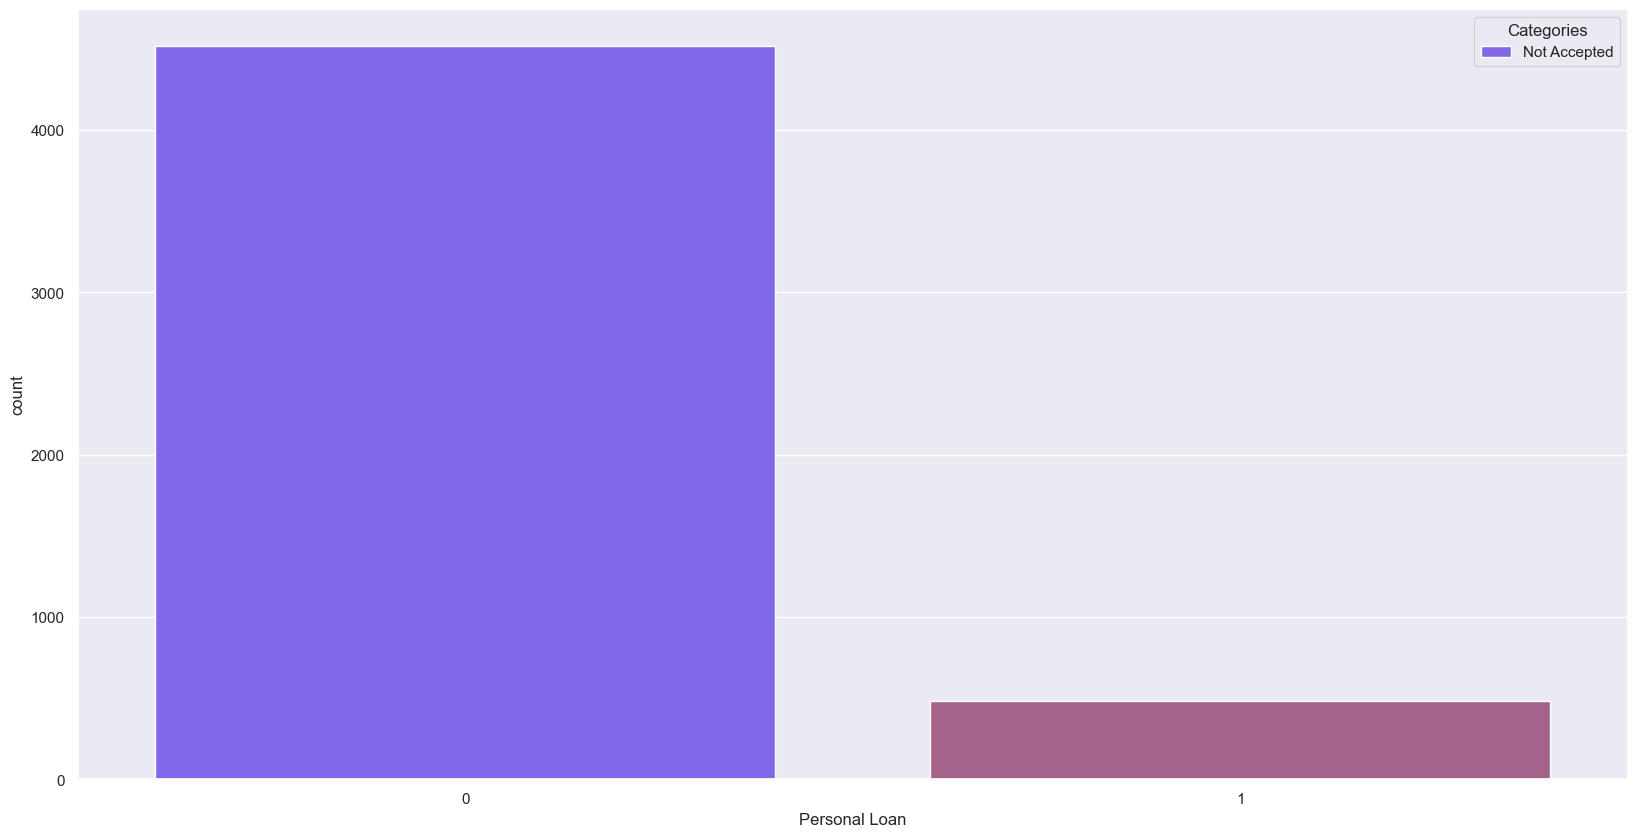

In [128]:
sns.set(style="darkgrid")
custom_colors = ["#7752FE","#B0578D"]
sns.countplot(x='Personal Loan', data=df2 , palette=custom_colors)
plt.legend(title='Categories', labels=['Not Accepted','Accepted'])
plt.show()

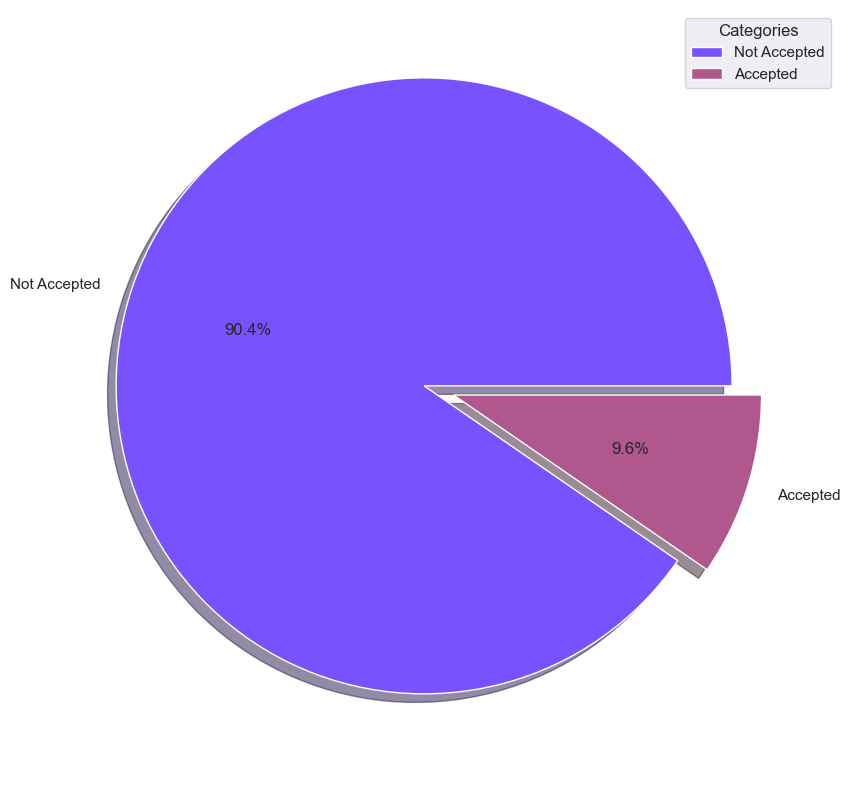

0    4518
1     480
Name: Personal Loan, dtype: int64

In [129]:
counts = df2['Personal Loan'].value_counts()

explode = (0.1, 0)
plt.pie(counts, labels=['Not Accepted','Accepted'], colors=custom_colors, autopct='%1.1f%%',explode=explode, shadow=True)
plt.legend(title='Categories', labels=['Not Accepted','Accepted'])
plt.show()


df2['Personal Loan'].value_counts()

class **imbalance** exist.

In [130]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

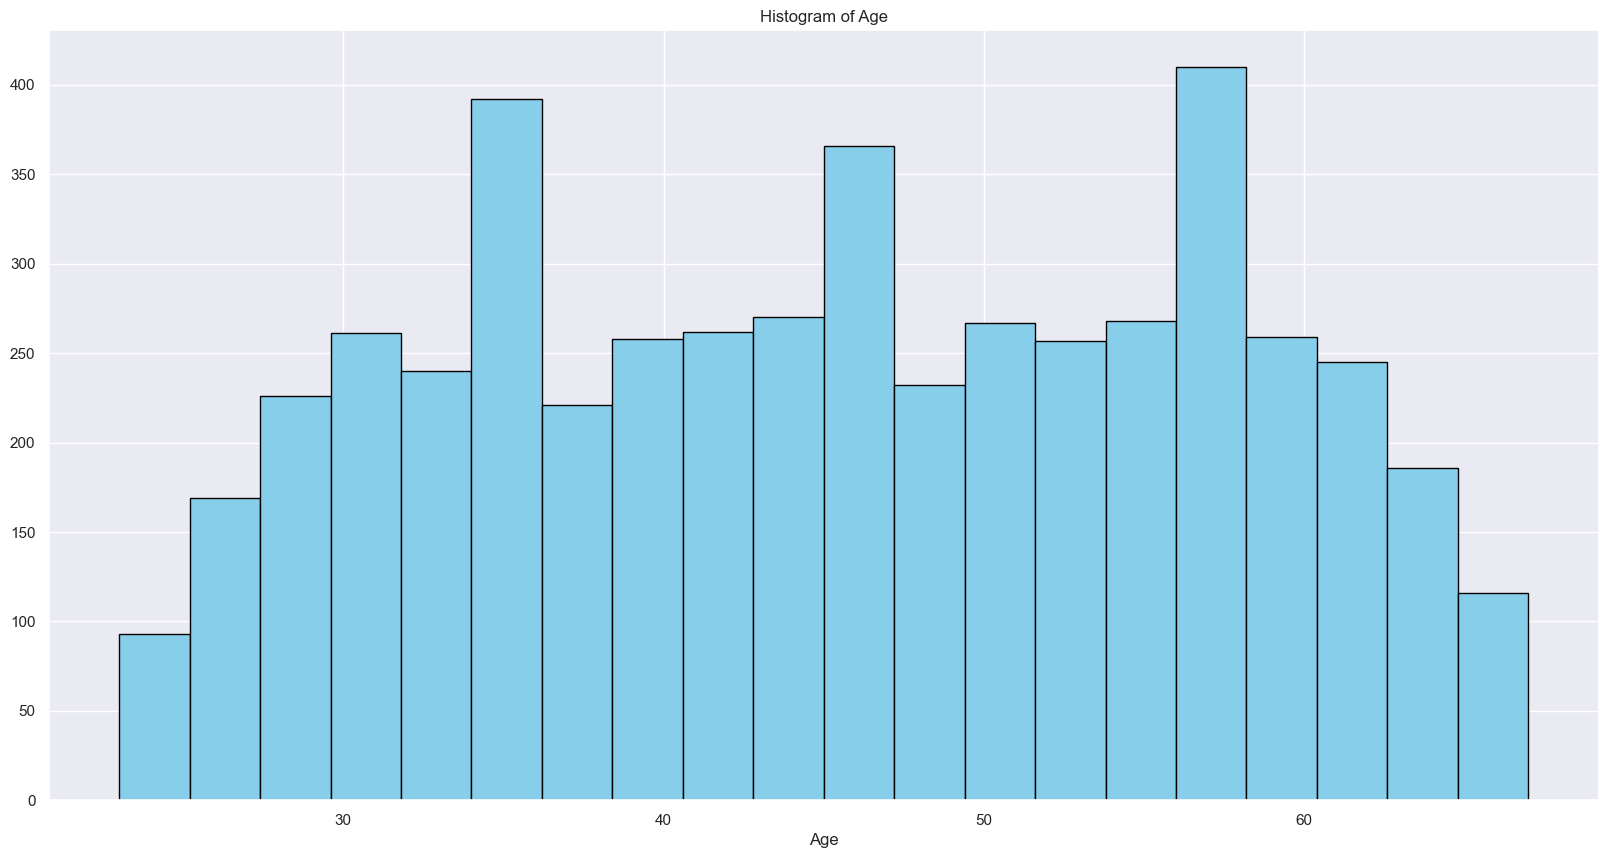

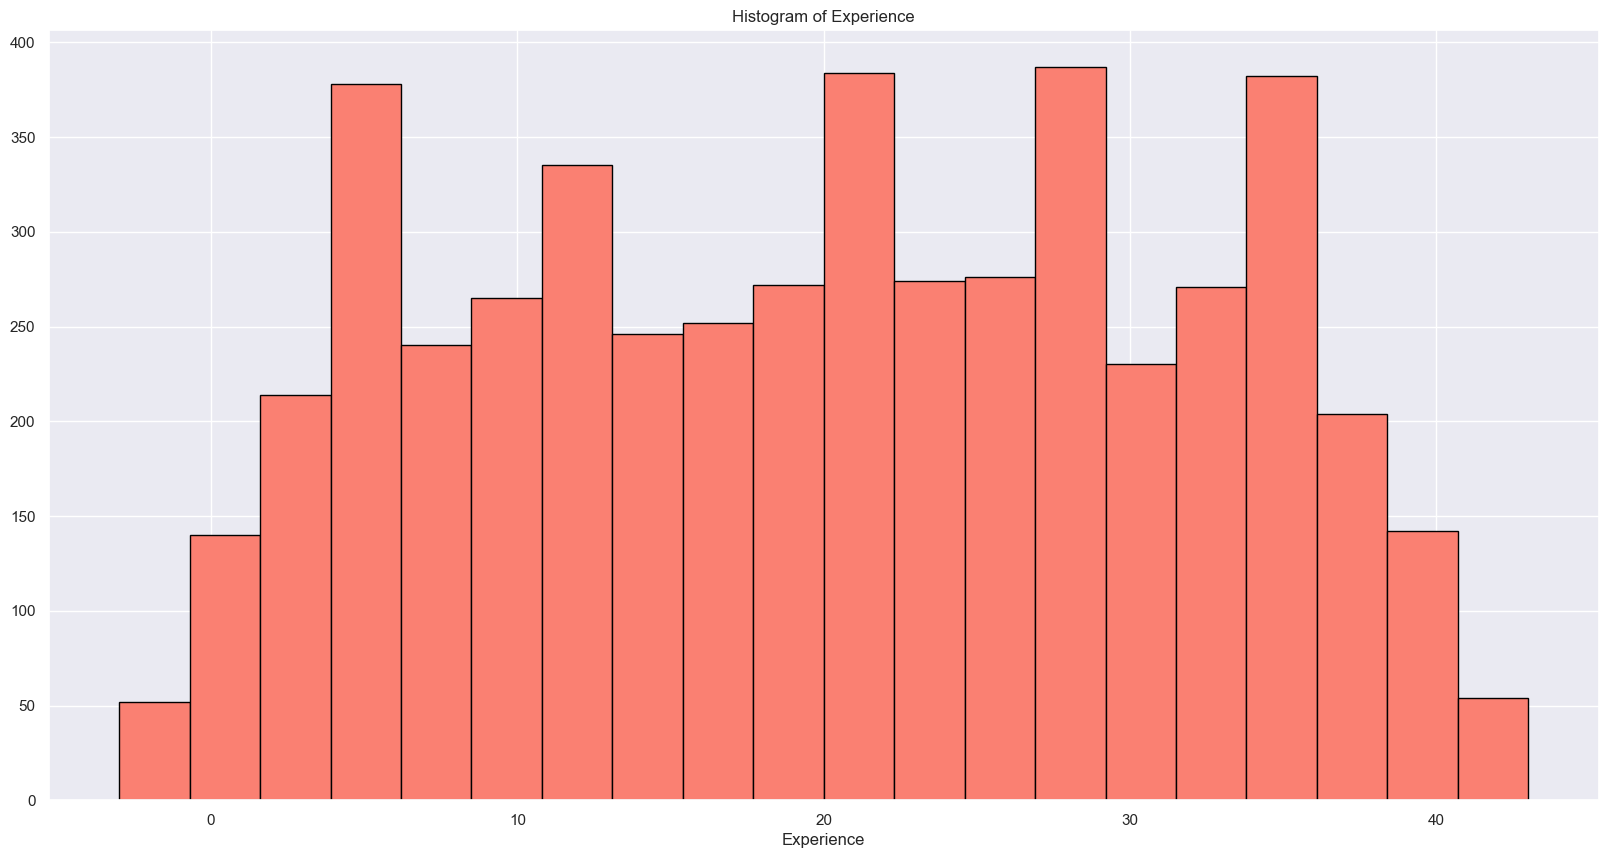

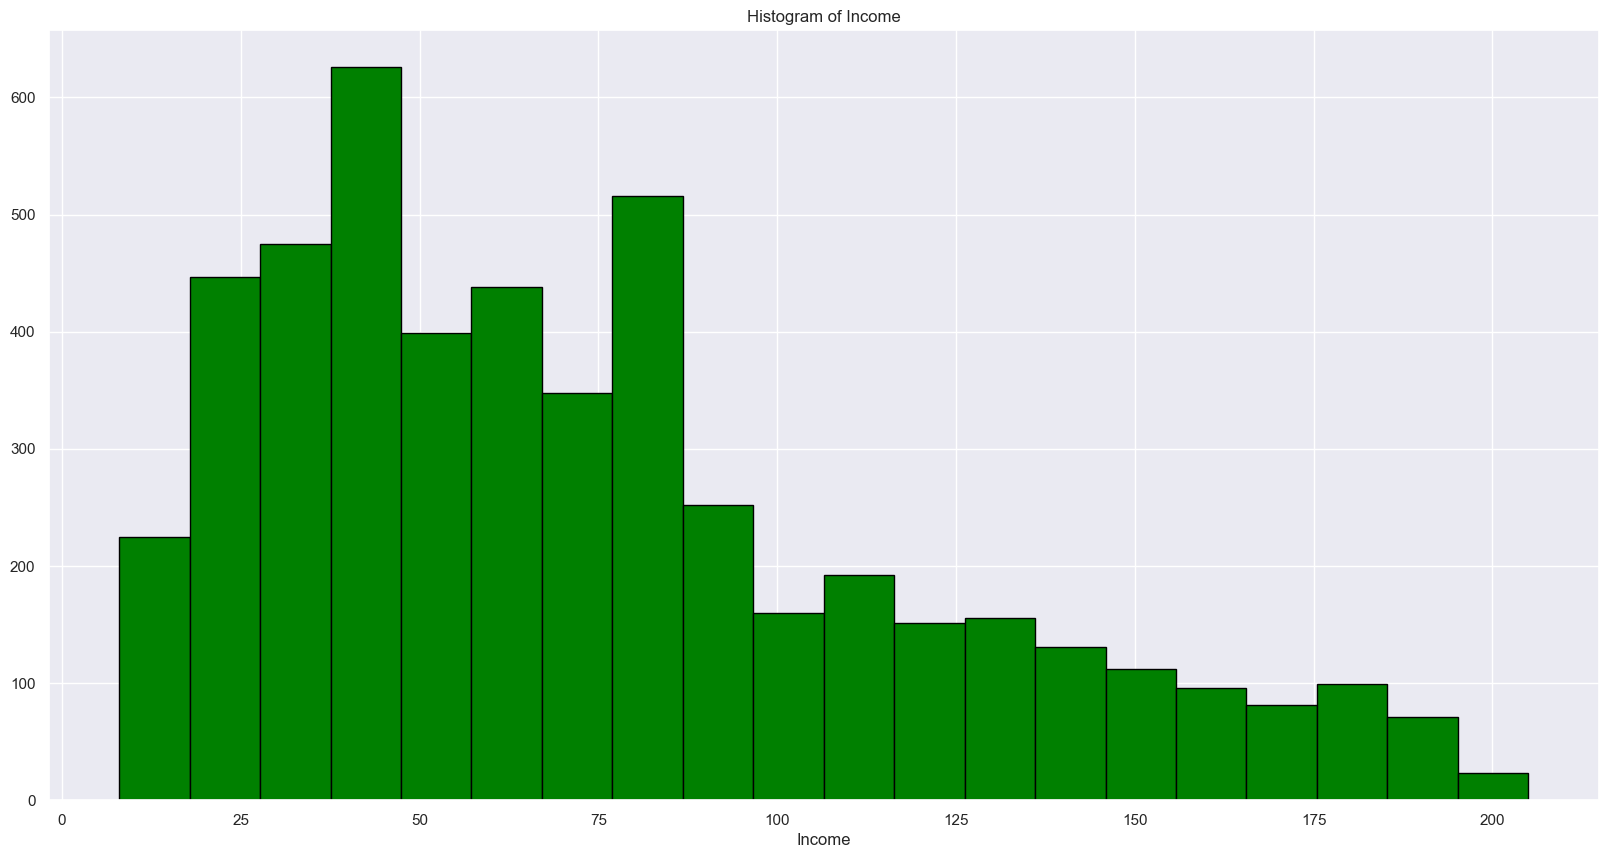

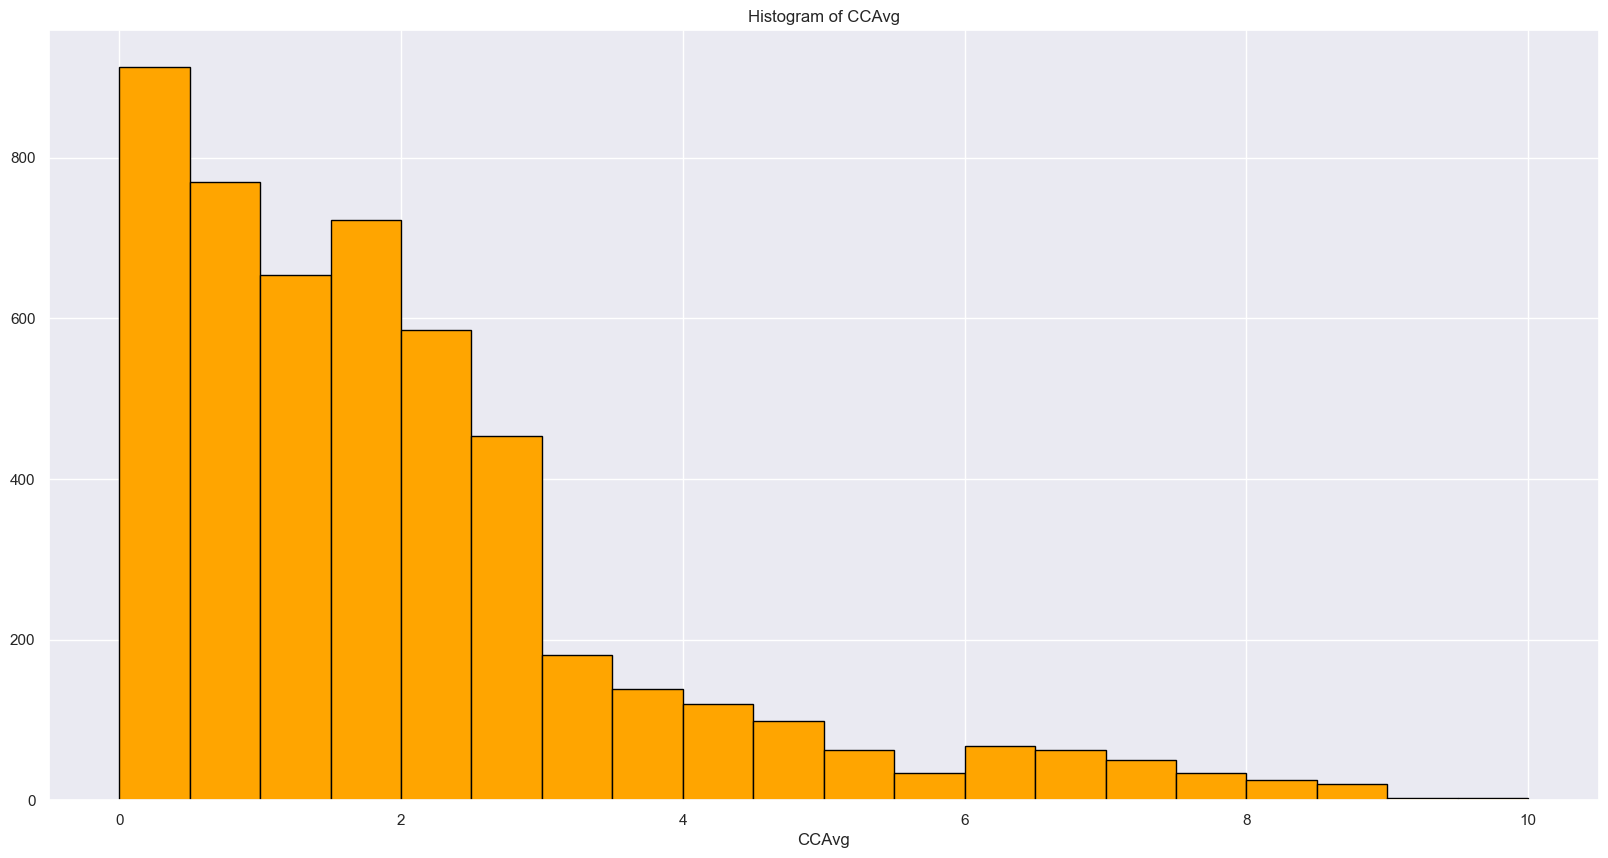

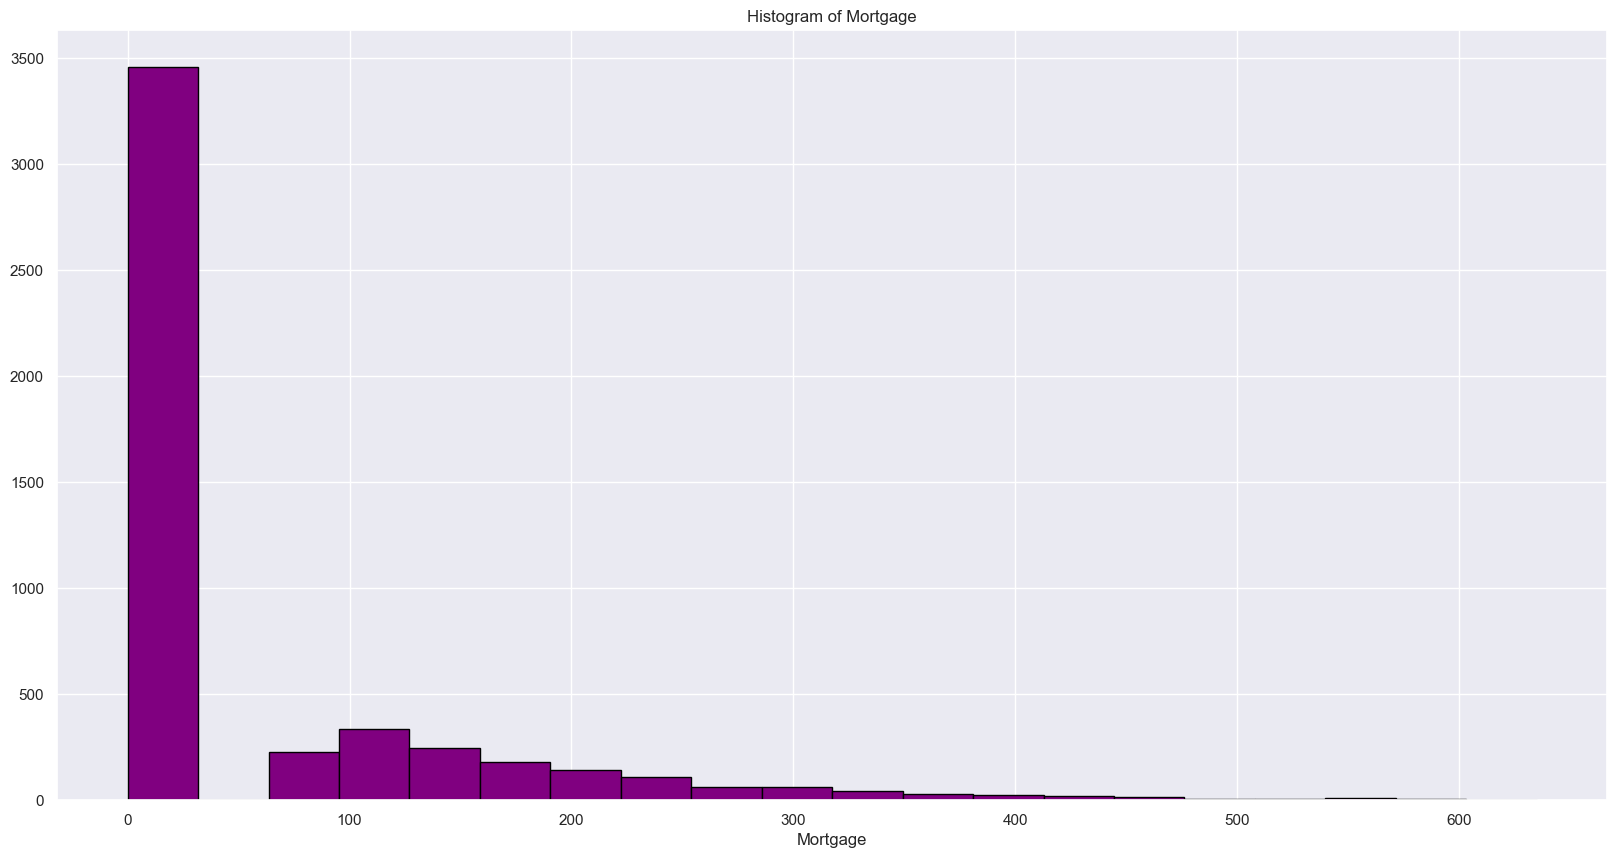

In [131]:
num_var = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
colors = ['skyblue', 'salmon', 'green', 'orange', 'purple']

for i, color in zip(num_var, colors):
    plt.hist(df[i], bins=20, color=color, edgecolor='black')
    plt.xlabel(i)
    plt.title(f'Histogram of {i}')
    plt.show()


##### Countplot of Family

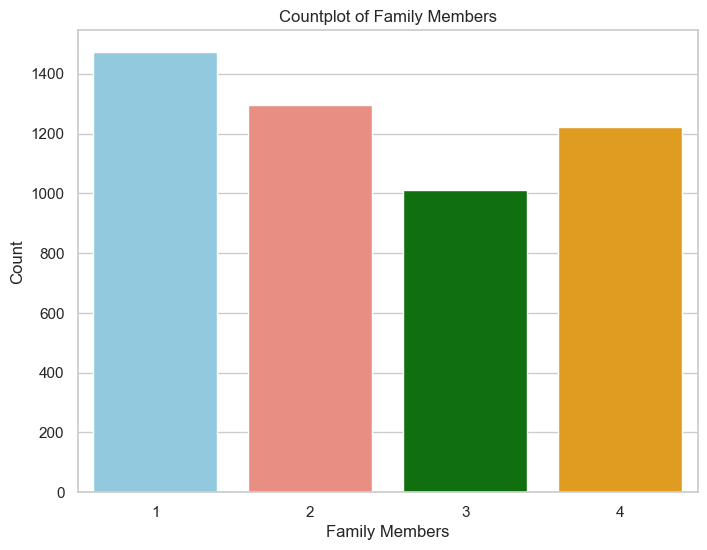

In [132]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Family', data=df2 ,  palette=colors)

# Add labels and title
plt.xlabel("Family Members")
plt.ylabel("Count")
plt.title("Countplot of Family Members")

# Show the plot
plt.show()

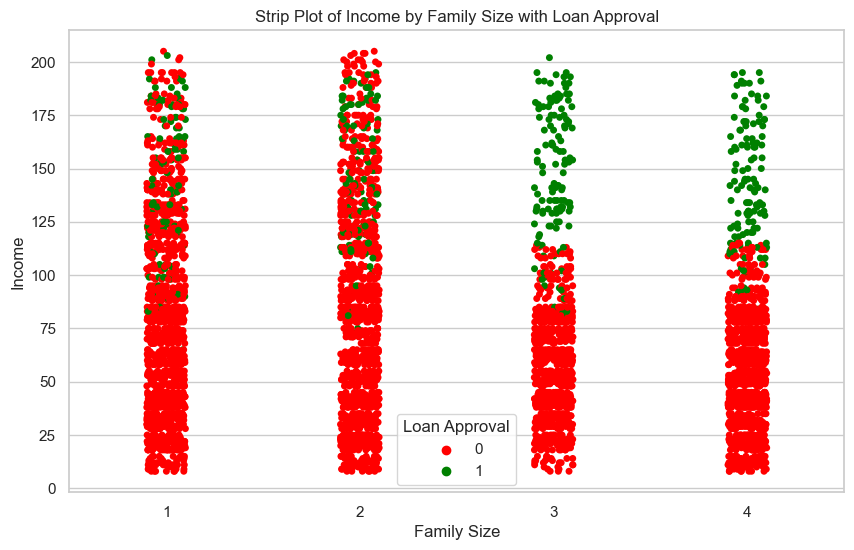

In [133]:
# Create a strip plot with color-coded classes
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.stripplot(x='Family', y='Income', hue='Personal Loan', data=df2, jitter=True, palette={1: 'green', 0: 'red'})

# Add labels and title
plt.xlabel("Family Size")
plt.ylabel("Income")
plt.title("Strip Plot of Income by Family Size with Loan Approval")

# Show the legend
plt.legend(title='Loan Approval')

# Show the plot
plt.show()

In [134]:
df2.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Mortgage', 'Personal Loan', 'Securities Account_0',
       'Securities Account_1', 'CD Account_0', 'CD Account_1', 'Online_0',
       'Online_1', 'CreditCard_0', 'CreditCard_1', 'Education_encoded'],
      dtype='object')

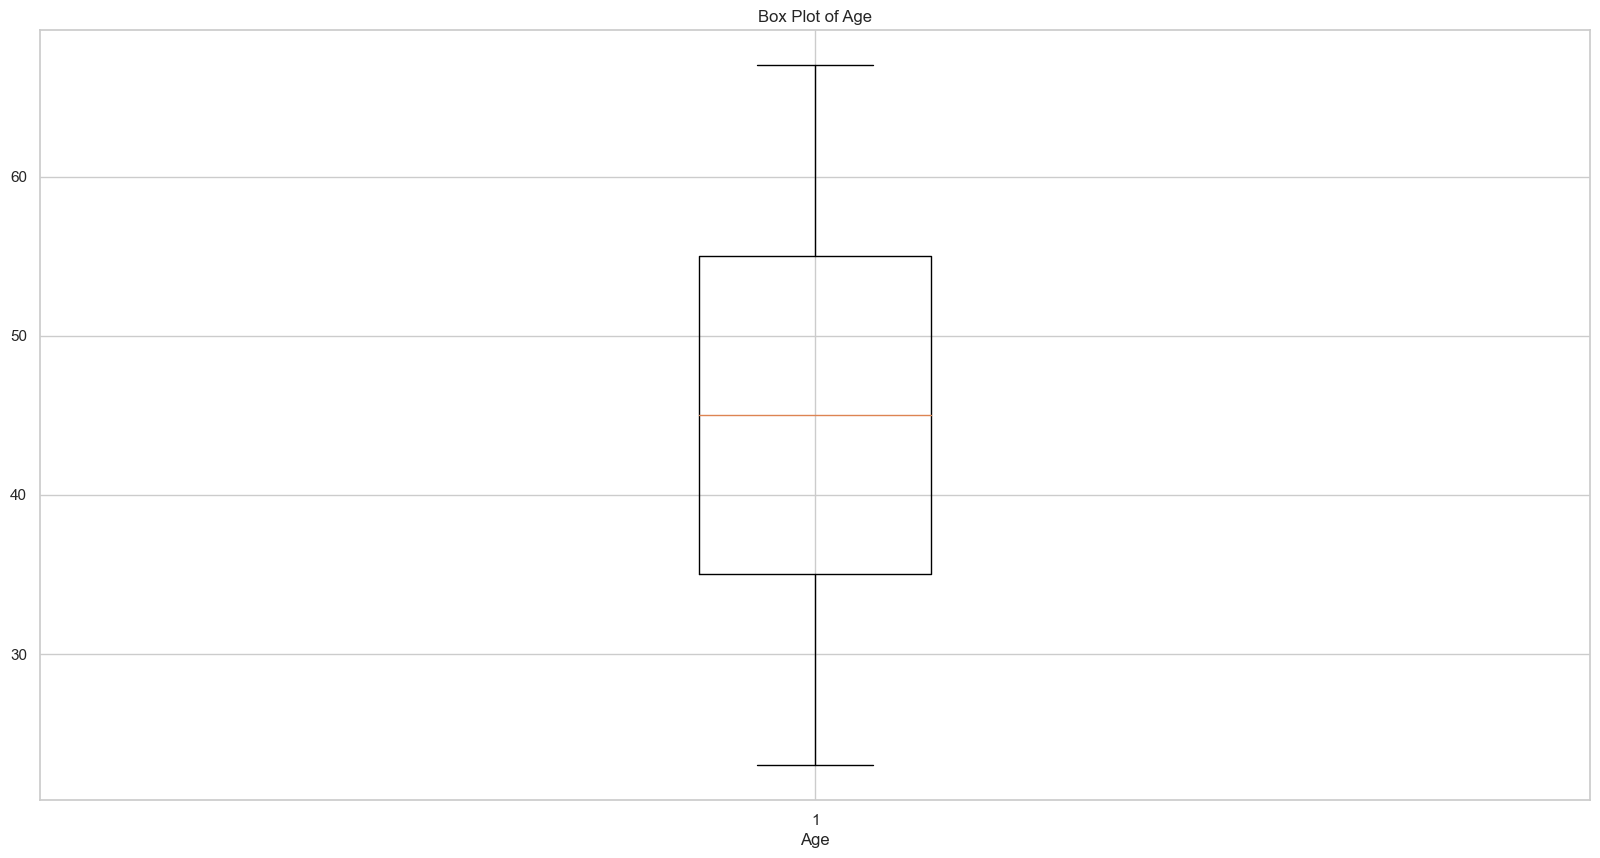

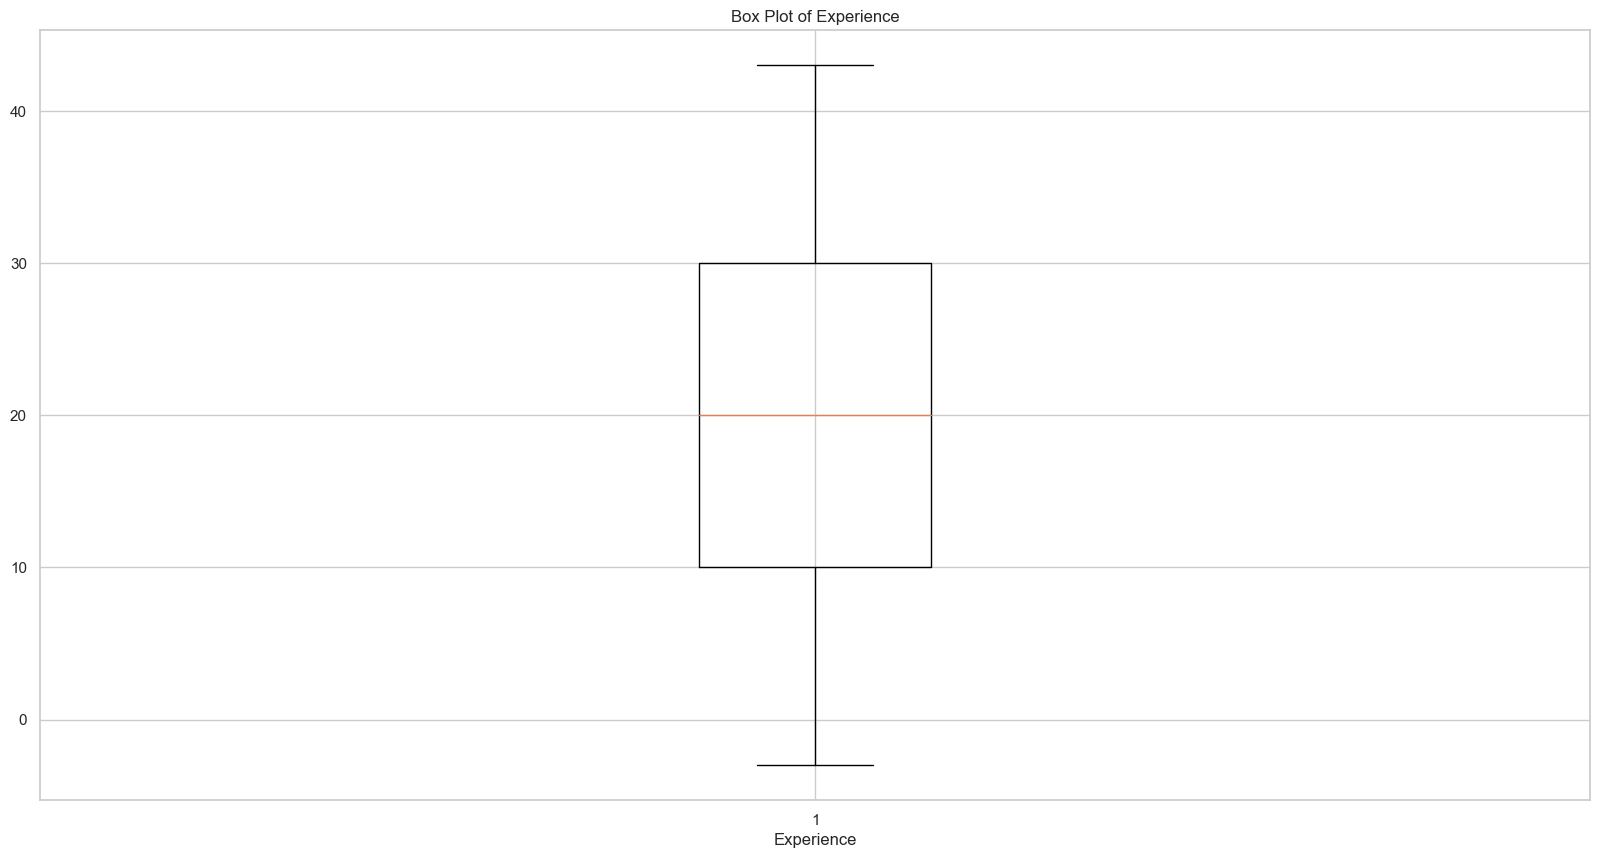

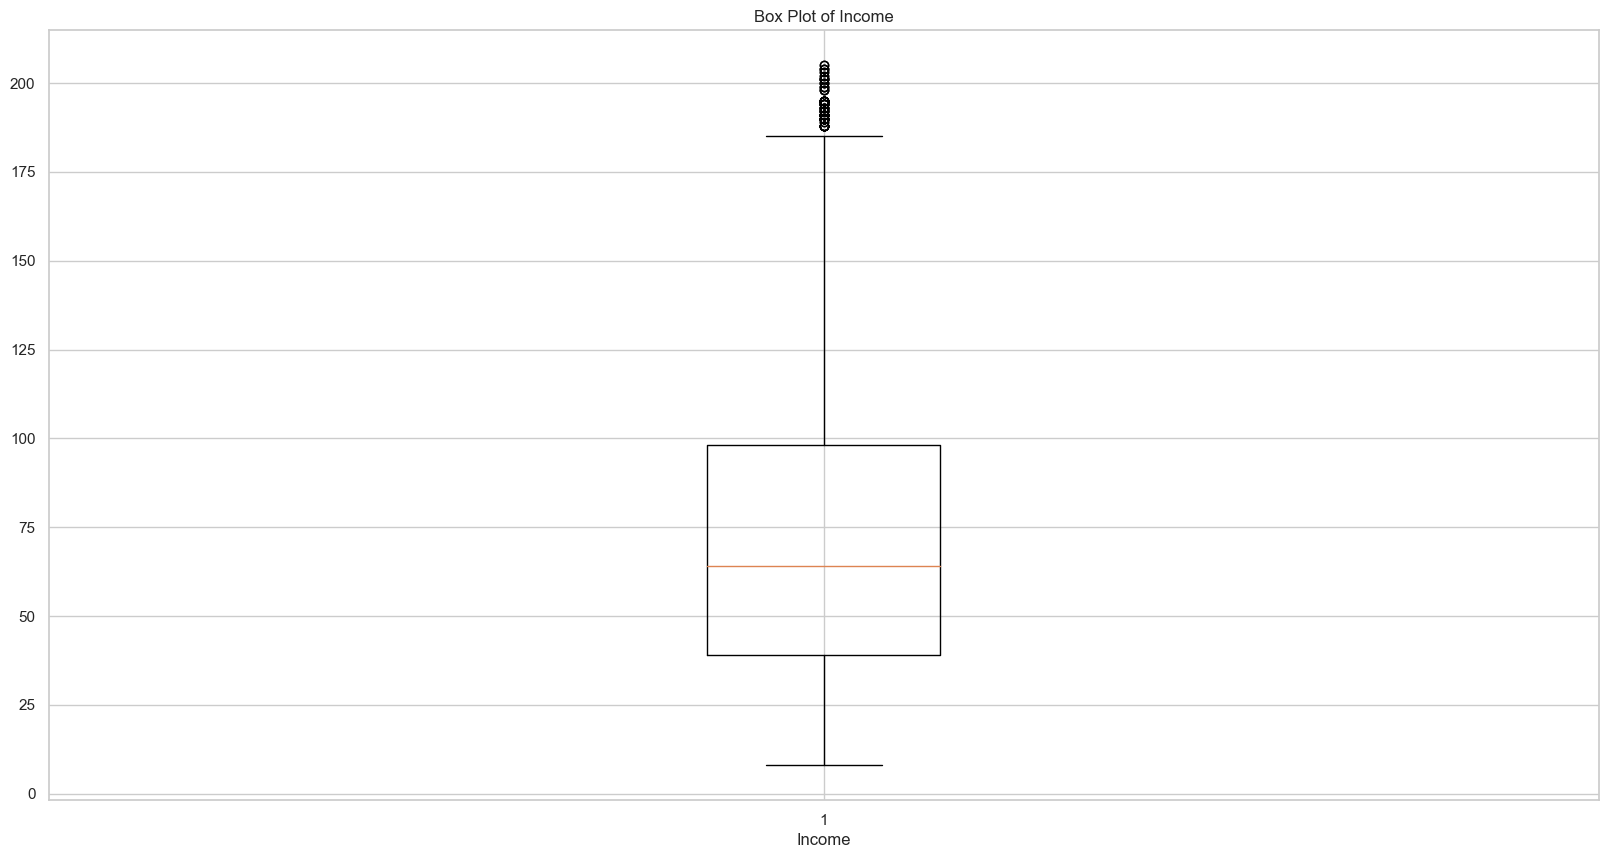

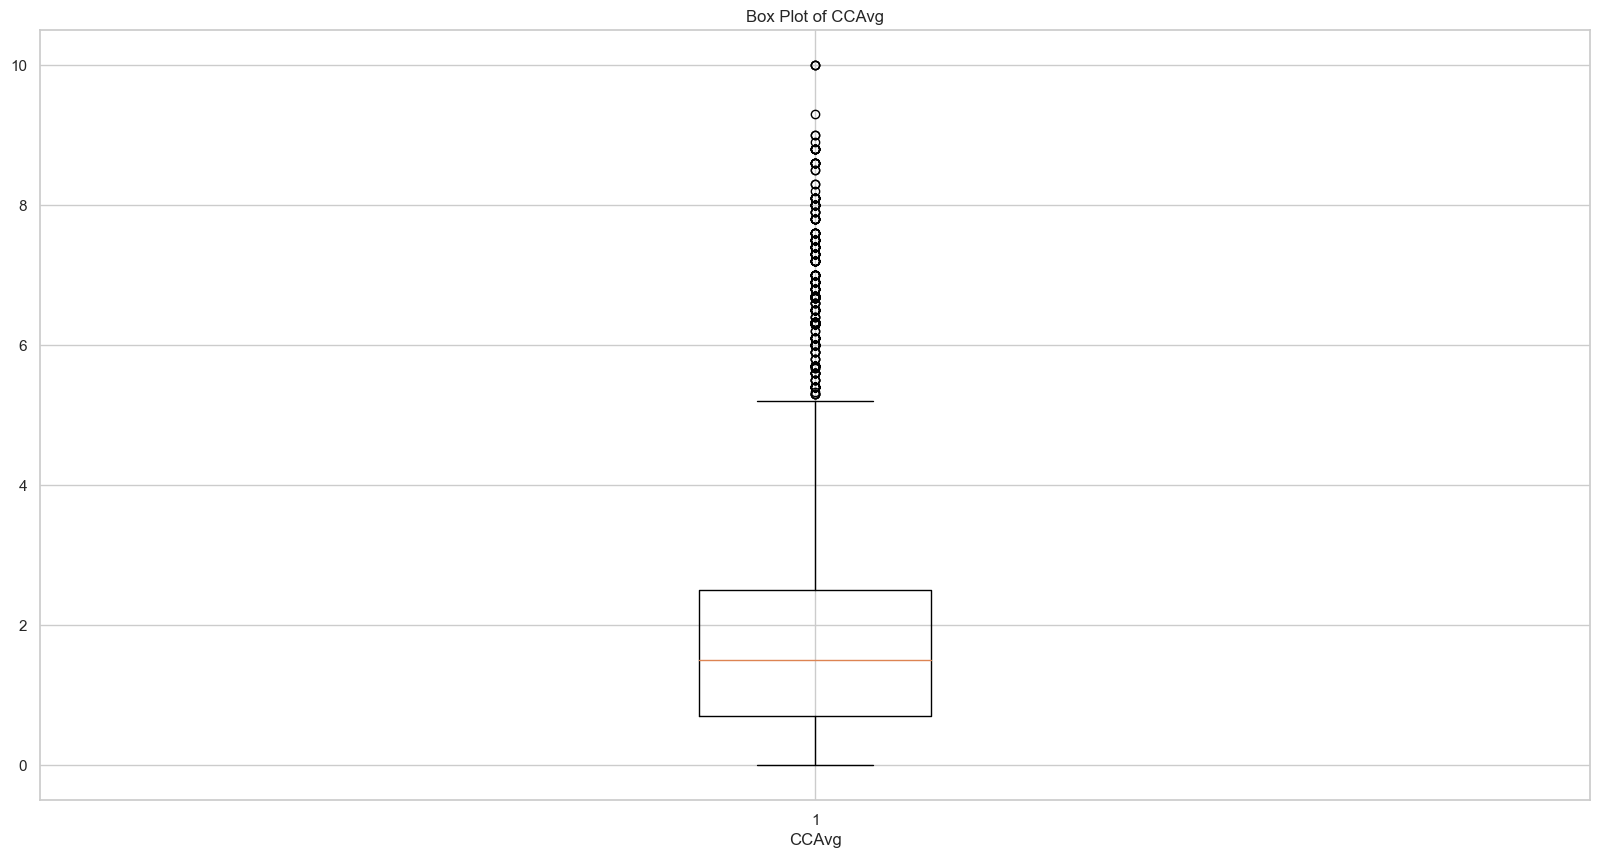

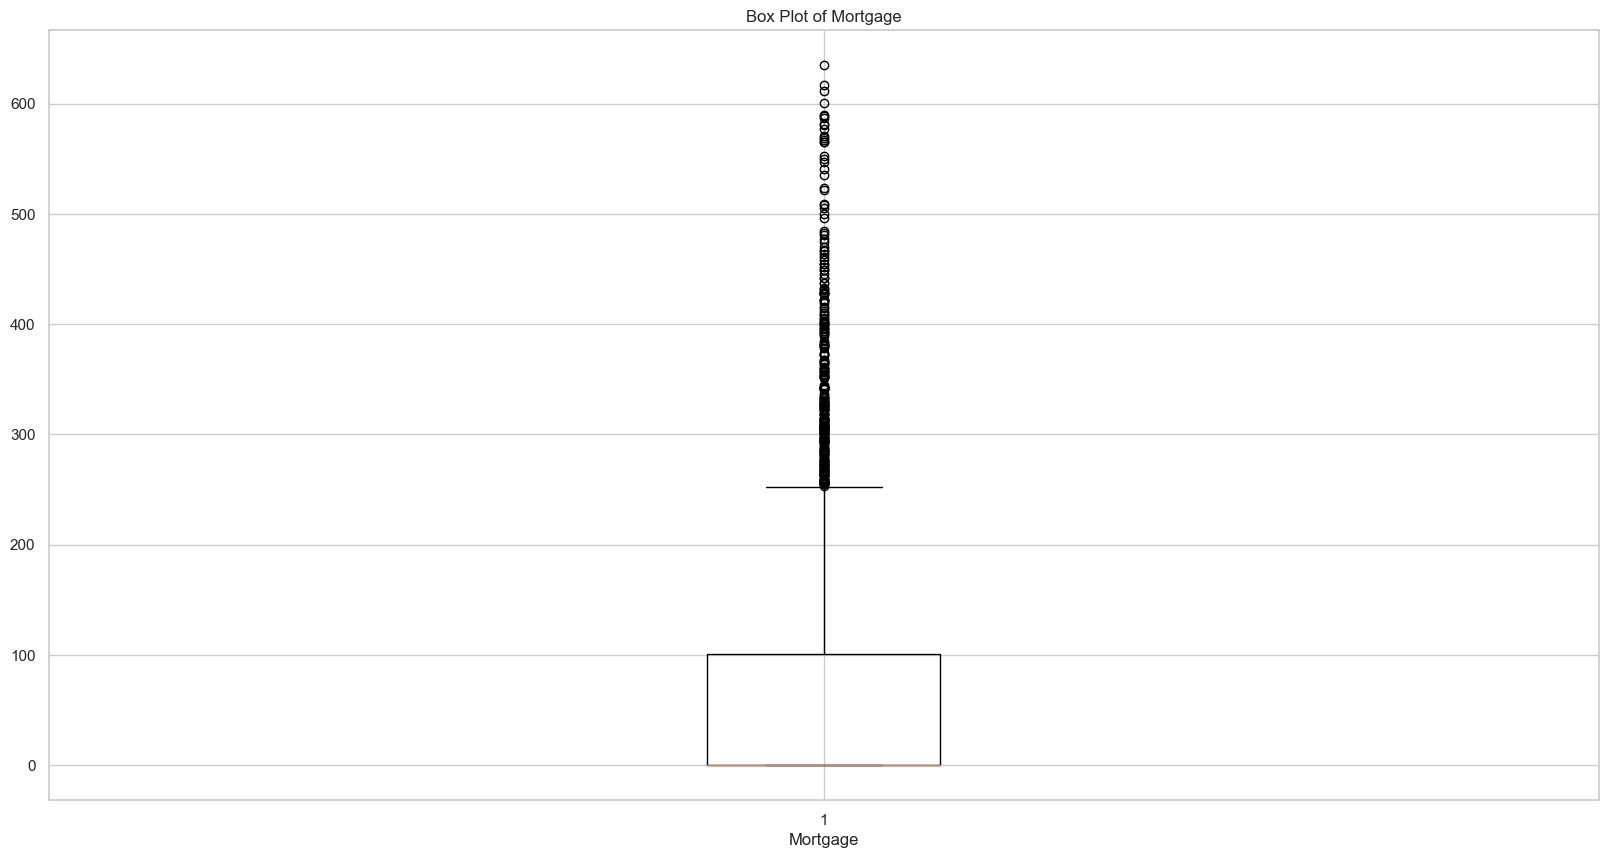

In [135]:
for i in num_var:
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.title(f'Box Plot of {i}')
    plt.show()

In [136]:
#there are outliers in ccavg, mortgage and income variables

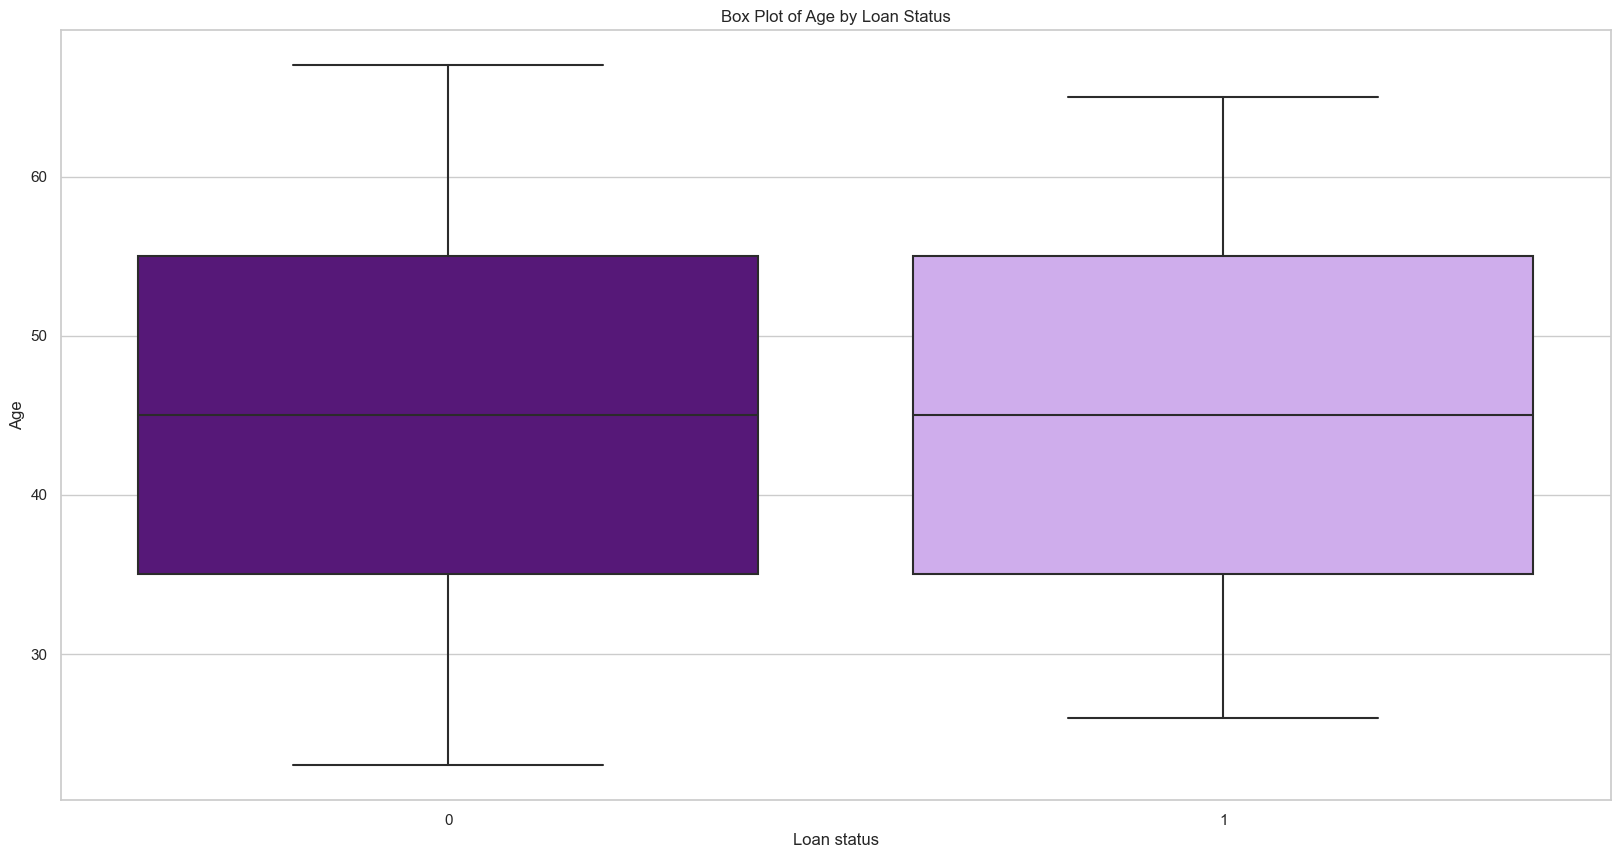

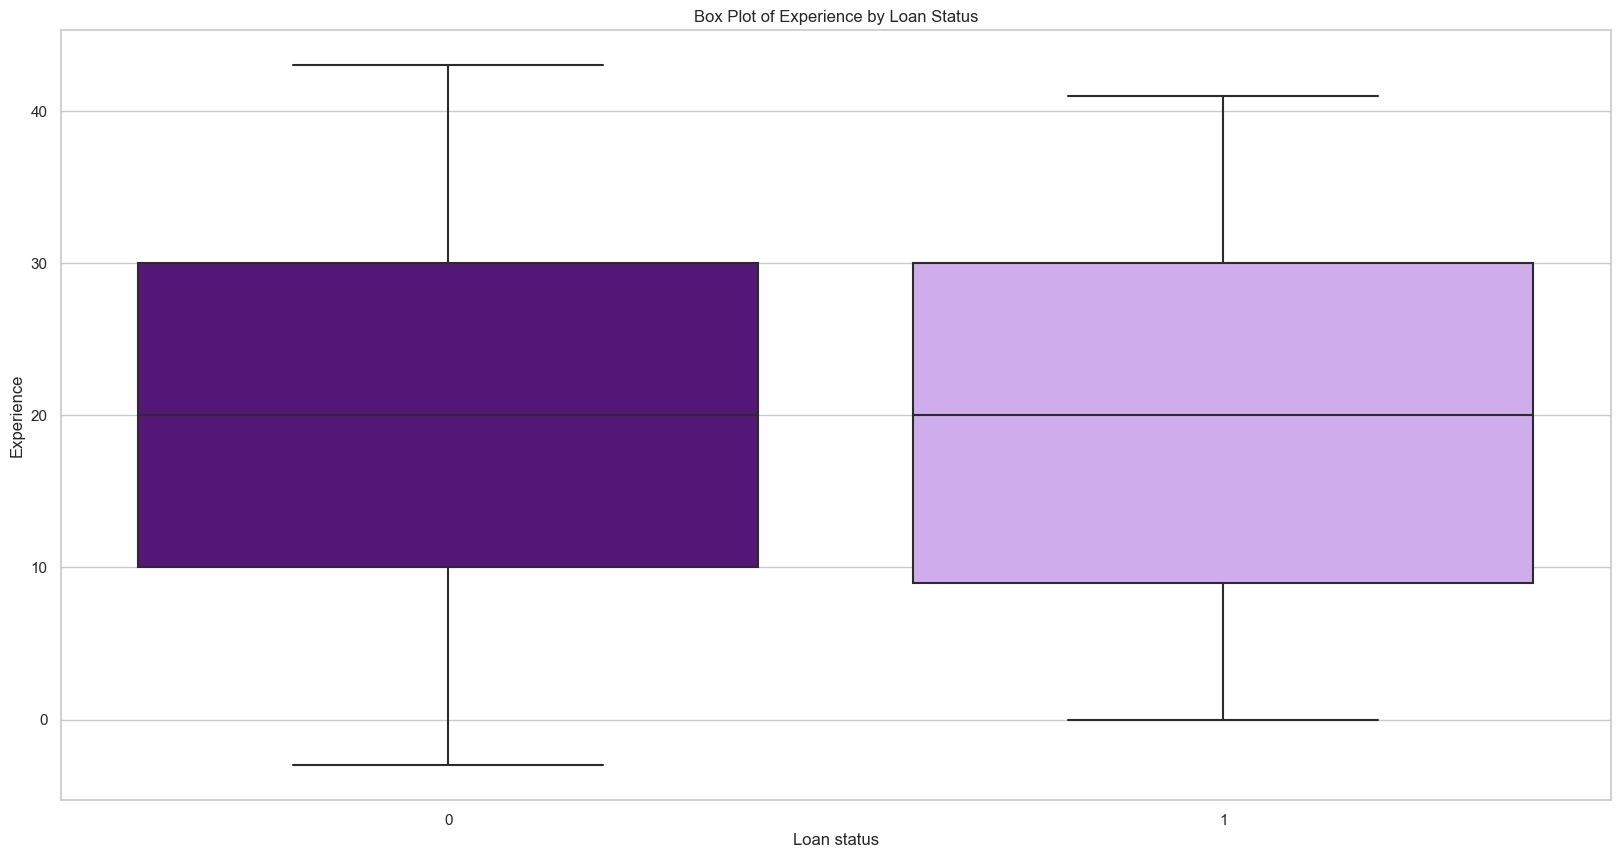

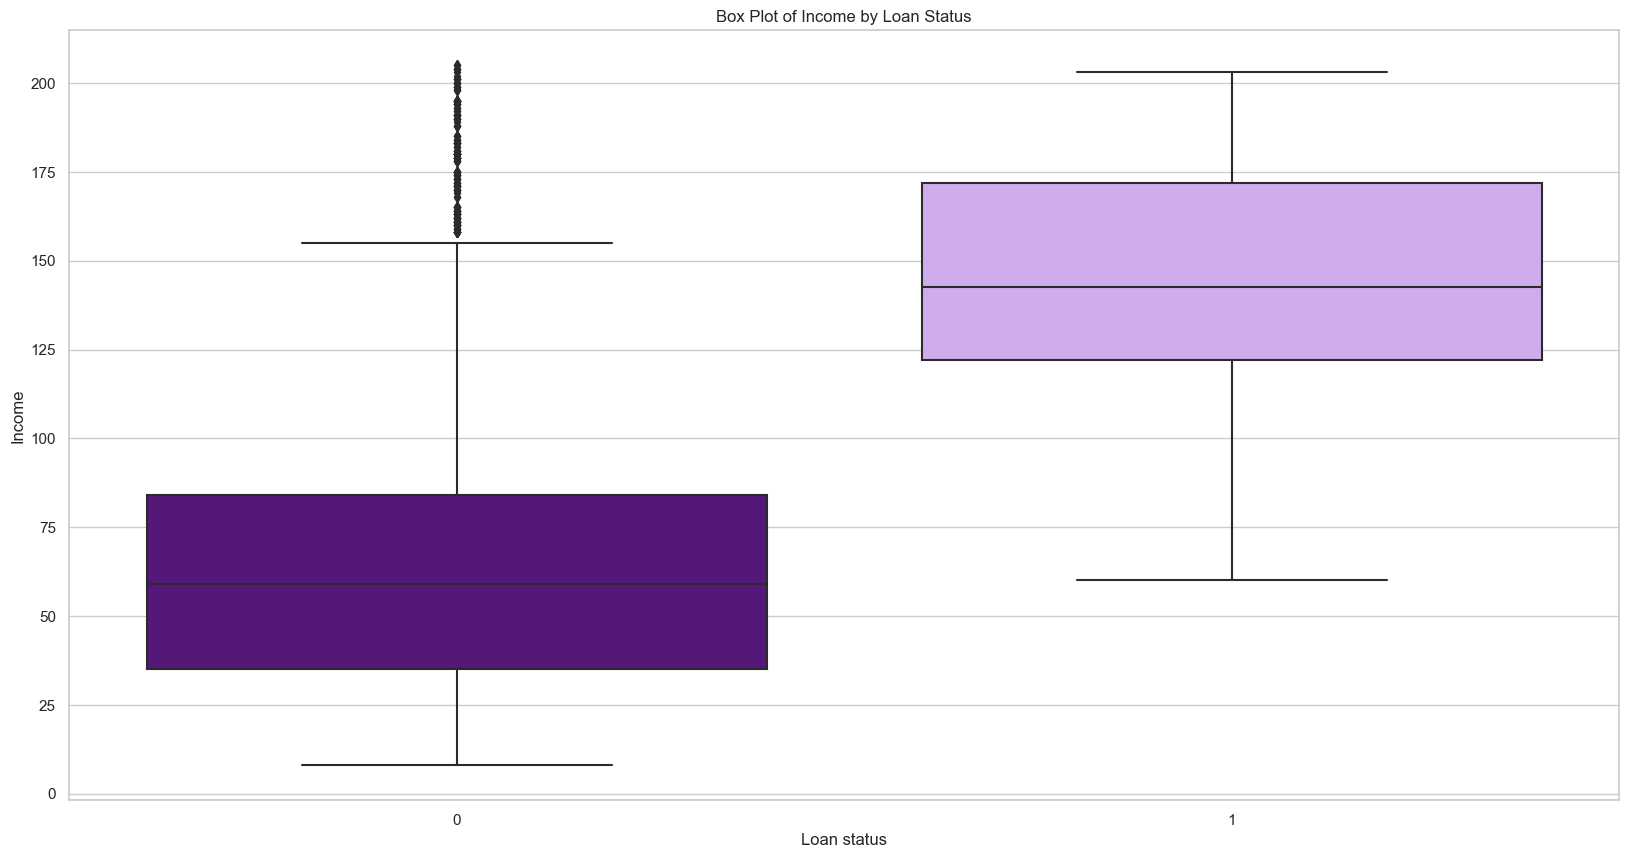

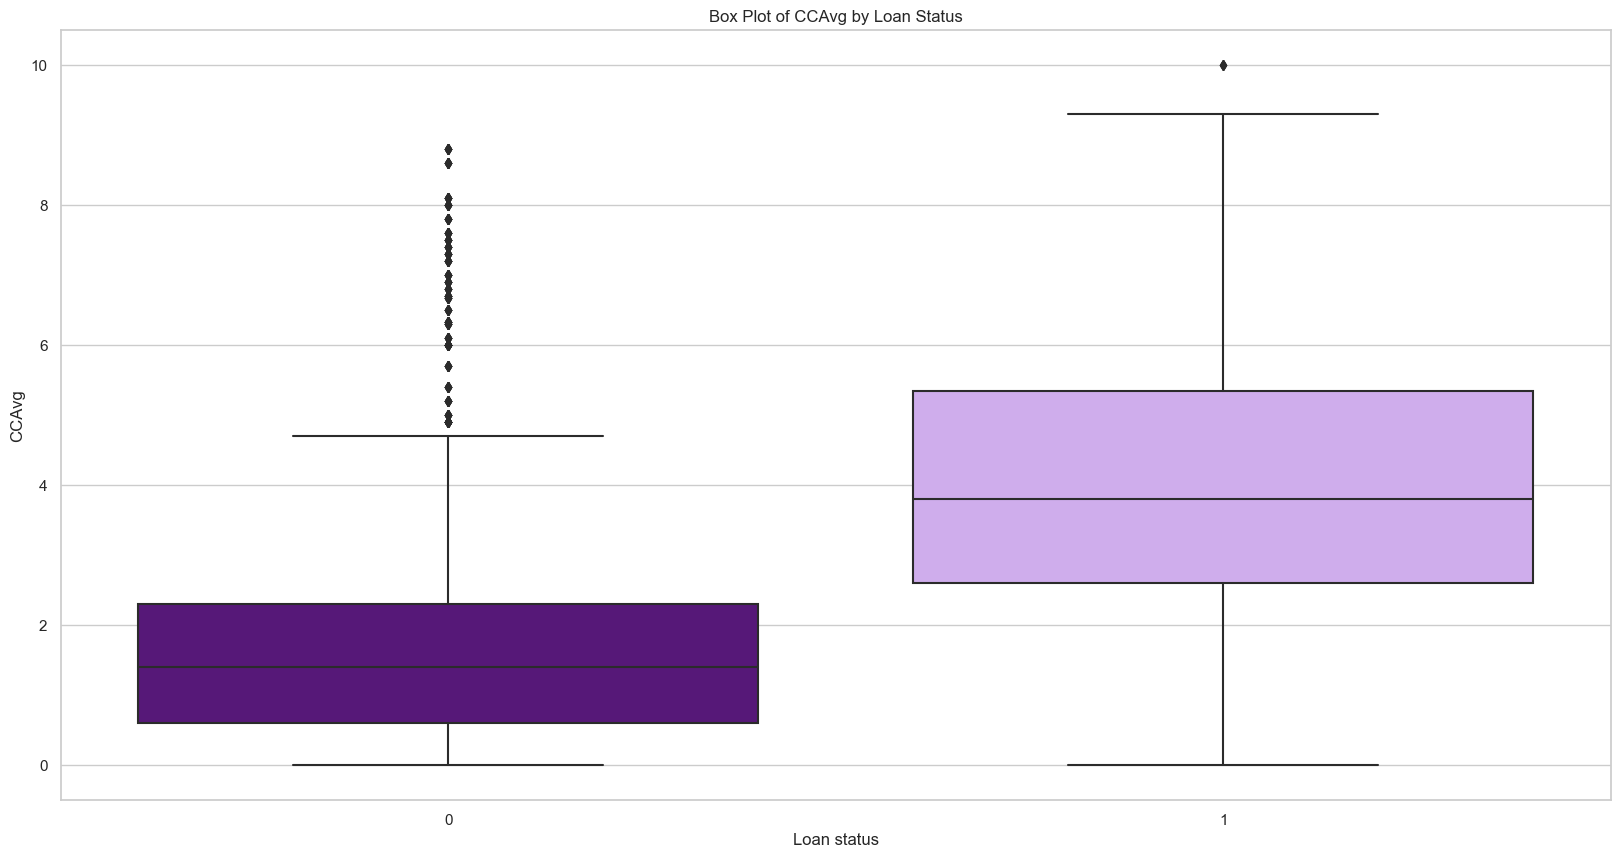

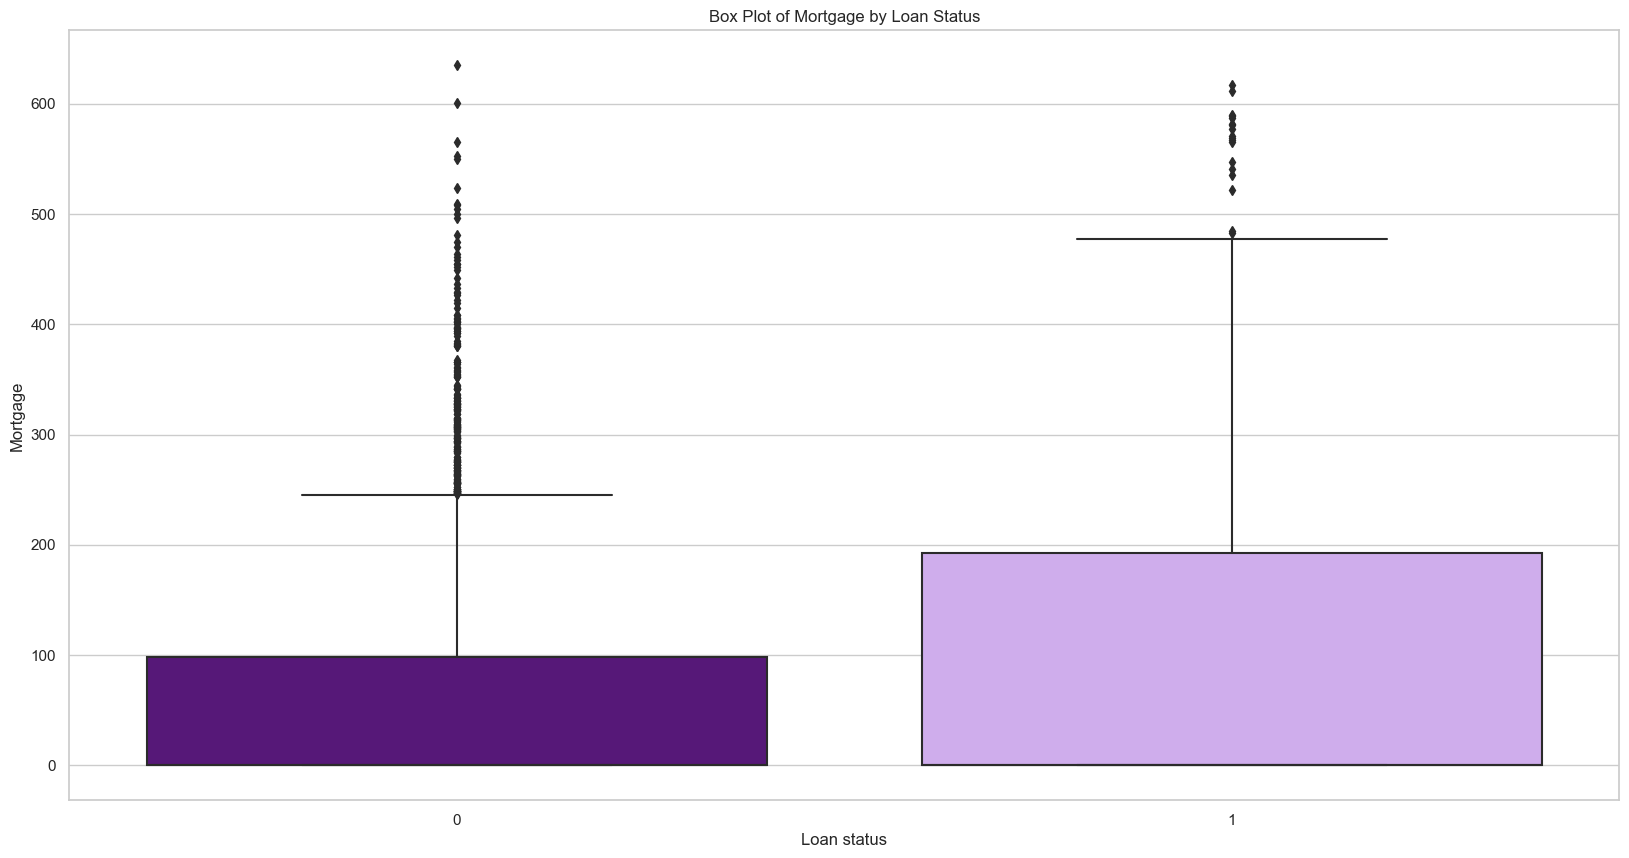

In [137]:
colors = ['#5B0888', '#D0A2F7']
for i in num_var:
    sns.boxplot(data=df, x='Personal Loan', y=i, palette = colors)

    # Add labels and title
    plt.xlabel('Loan status')
    plt.ylabel(i)
    plt.title(f'Box Plot of {i} by Loan Status')

    # Show the plot
    plt.show()
    
    

Contingency Table for Securities Account_vs_Personal Loan: 
Personal Loan          0    1
Securities Account           
0                   4056  420
1                    462   60



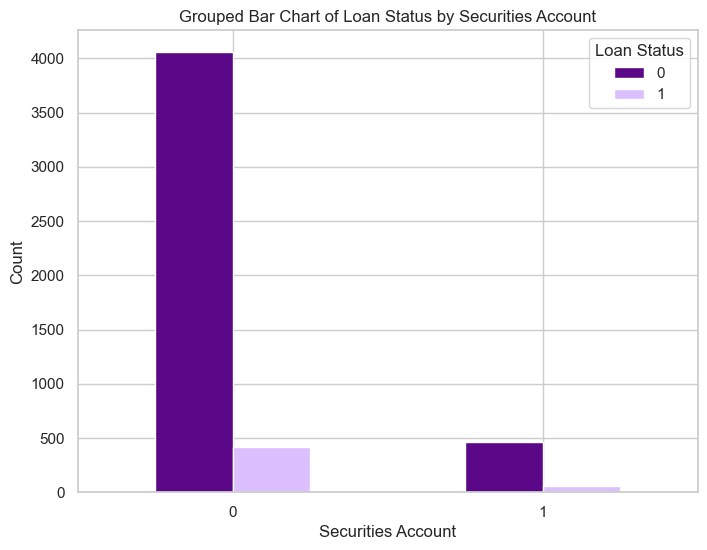

Contingency Table for CD Account_vs_Personal Loan: 
Personal Loan     0    1
CD Account              
0              4357  340
1               161  140



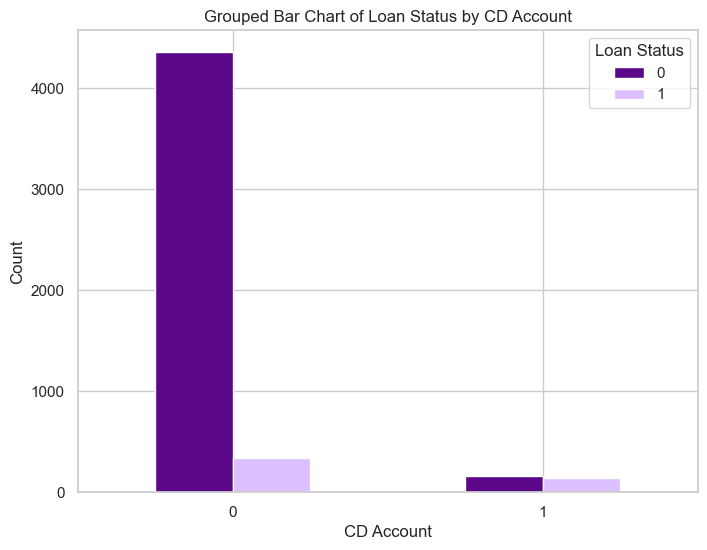

Contingency Table for Online_vs_Personal Loan: 
Personal Loan     0    1
Online                  
0              1827  189
1              2691  291



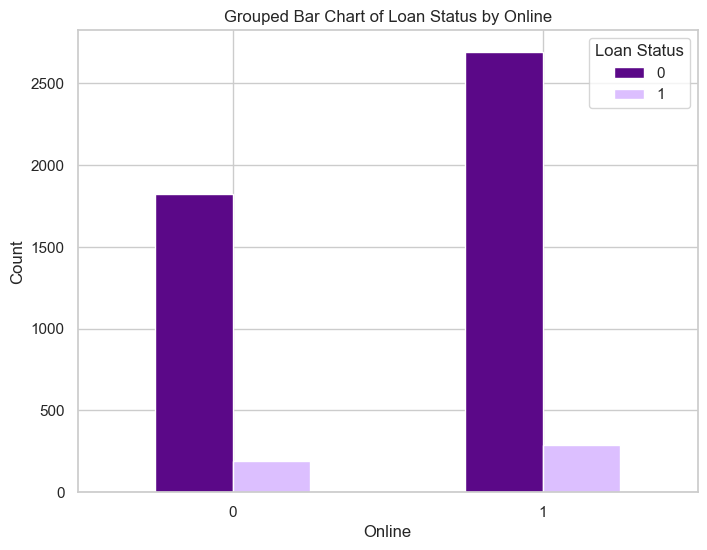

Contingency Table for CreditCard_vs_Personal Loan: 
Personal Loan     0    1
CreditCard              
0              3192  337
1              1326  143



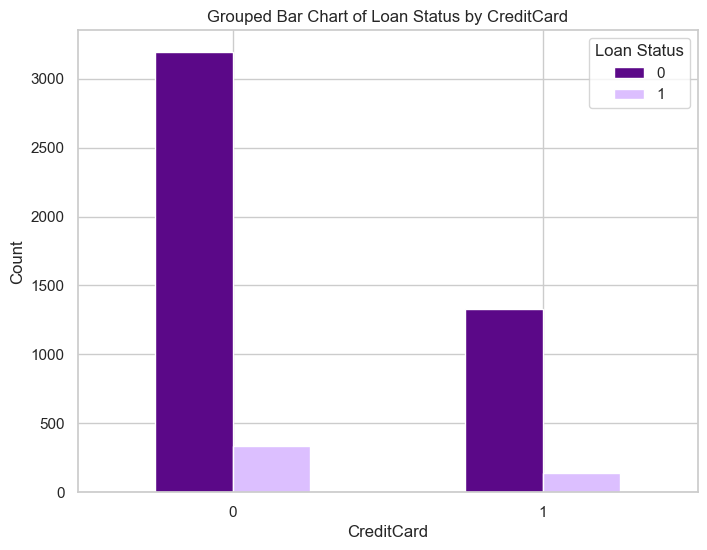

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

binary_var = ['Securities Account', 'CD Account', 'Online', 'CreditCard']
col = ['#5B0888', '#DCBFFF']
contingency_tables = {}

for i in range(len(binary_var)):
    var1 = binary_var[i]

    # Create a contingency table using the crosstab function
    contingency_table = pd.crosstab(df[var1], df['Personal Loan'])

    # Store the contingency table in the dictionary
    contingency_tables[f'{var1}_vs_Personal Loan'] = contingency_table

    print(f'Contingency Table for {var1}_vs_Personal Loan: \n{contingency_table}\n')

    # Plotting with colors
    ax = contingency_table.plot(kind='bar', rot=0, color=col, figsize=(8, 6))
    
    plt.xlabel(var1)
    plt.ylabel('Count')
    plt.title(f'Grouped Bar Chart of Loan Status by {var1}')
    plt.legend(title='Loan Status')
    plt.show()


Contingency Table for Securities Account_vs_Personal Loan: 
Personal Loan          0    1
Securities Account           
0                   4056  420
1                    462   60



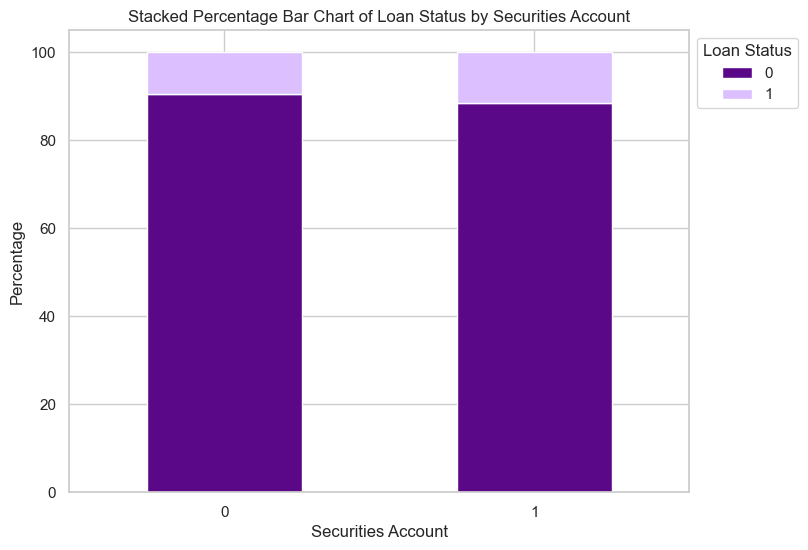

Contingency Table for CD Account_vs_Personal Loan: 
Personal Loan     0    1
CD Account              
0              4357  340
1               161  140



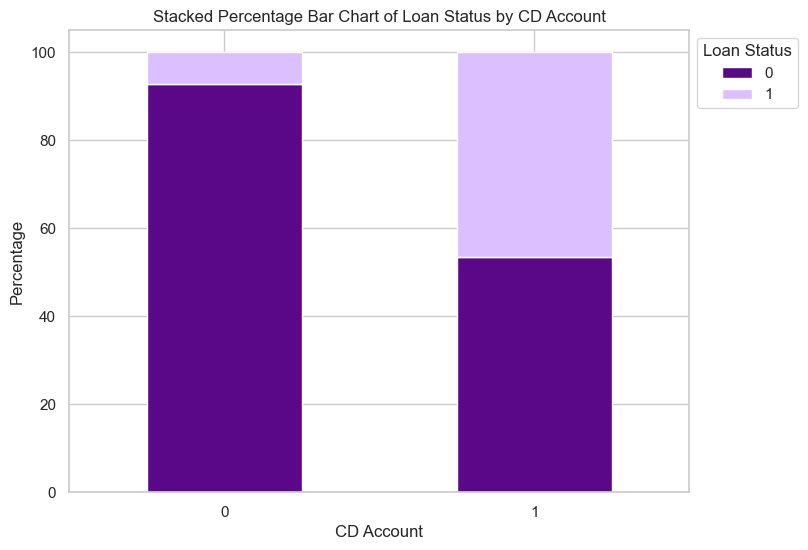

Contingency Table for Online_vs_Personal Loan: 
Personal Loan     0    1
Online                  
0              1827  189
1              2691  291



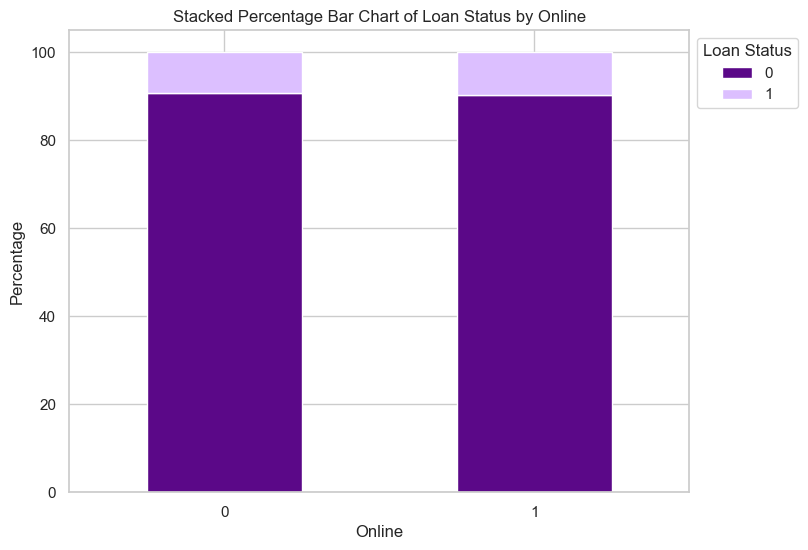

Contingency Table for CreditCard_vs_Personal Loan: 
Personal Loan     0    1
CreditCard              
0              3192  337
1              1326  143



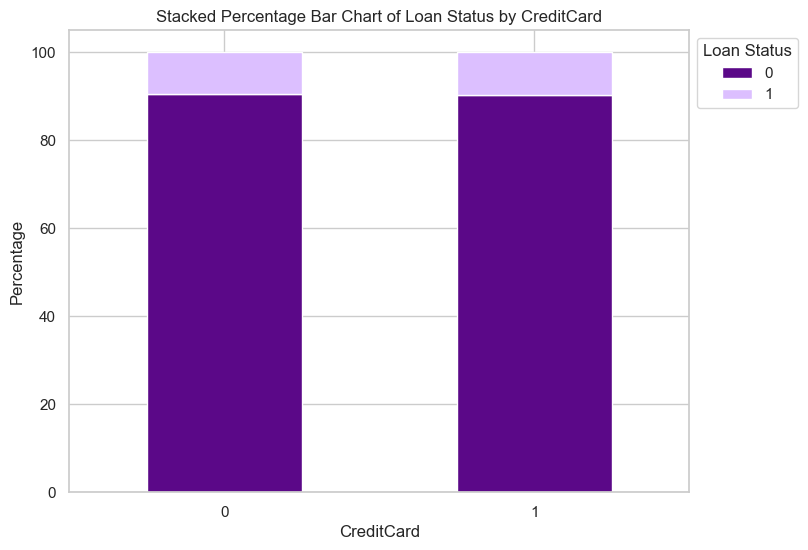

In [139]:
binary_var = ['Securities Account', 'CD Account', 'Online', 'CreditCard']
colors = ['#5B0888', '#DCBFFF']

contingency_tables = {}

for i in range(len(binary_var)):
    var1 = binary_var[i]

    # Create a contingency table using the crosstab function
    contingency_table = pd.crosstab(df[var1], df['Personal Loan'])

    # Store the contingency table in the dictionary
    contingency_tables[f'{var1}_vs_Personal Loan'] = contingency_table

    print(f'Contingency Table for {var1}_vs_Personal Loan: \n{contingency_table}\n')

    # Convert counts to percentages
    contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

    # Plot the stacked percentage bar chart
    ax = contingency_table_percentage.plot(kind='bar', rot=0, figsize=(8, 6), color=colors, stacked=True)
    plt.xlabel(var1)
    plt.ylabel('Percentage')
    plt.title(f'Stacked Percentage Bar Chart of Loan Status by {var1}')
    plt.legend(title='Loan Status', bbox_to_anchor=(1, 1), loc='upper left')
    plt.show()

In [140]:
df2.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Mortgage', 'Personal Loan', 'Securities Account_0',
       'Securities Account_1', 'CD Account_0', 'CD Account_1', 'Online_0',
       'Online_1', 'CreditCard_0', 'CreditCard_1', 'Education_encoded'],
      dtype='object')

##### Education encoded

In [141]:
df2['Education_encoded'].unique()

array([0, 1, 2], dtype=int64)

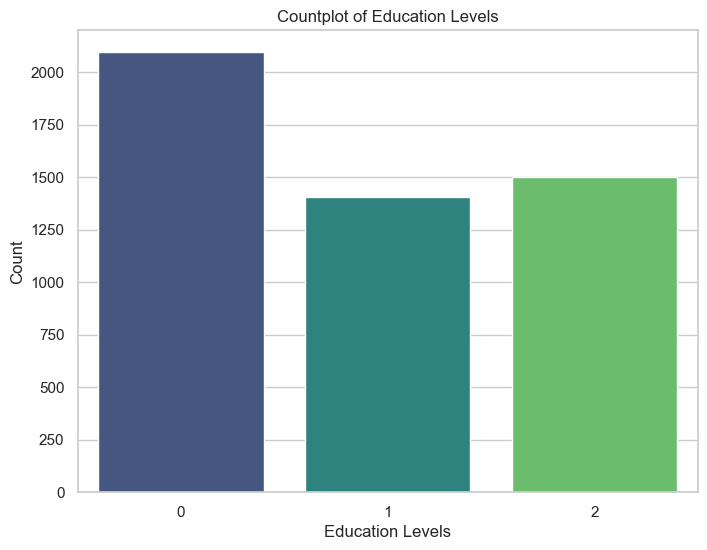

In [142]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Education_encoded', data=df2 , palette="viridis")

# Add labels and title
plt.xlabel("Education Levels")
plt.ylabel("Count")
plt.title("Countplot of Education Levels")

# Show the plot
plt.show()

Contingency Table for Education_encoded_vs_Personal Loan: 
Personal Loan         0    1
Education_encoded           
0                  2001   93
1                  1221  182
2                  1296  205



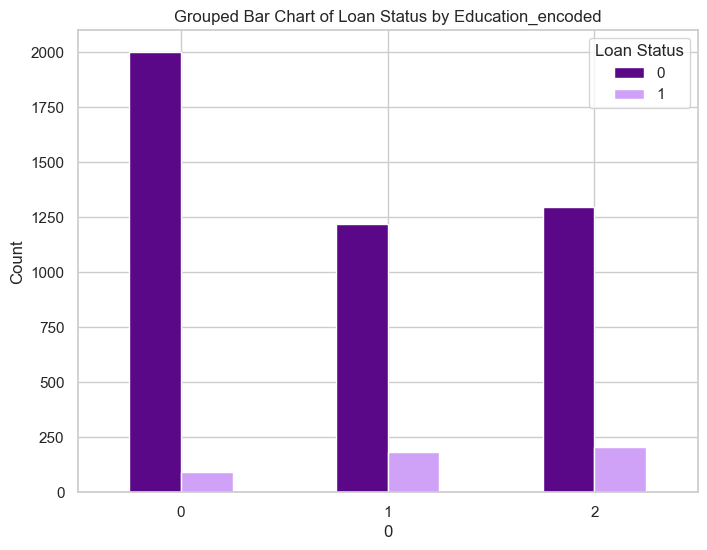

In [143]:
bin_var = ['Education_encoded']
colors = ['#5B0888', '#D0A2F7']

contingency_tables = {}
for i in range(len(bin_var)):
        var1 = bin_var[i]
        
        # Create a contingency table using the crosstab function
        contingency_table = pd.crosstab(df2[var1], df['Personal Loan'])
        
        # Store the contingency table in the dictionary
        contingency_tables[f'{var1}_vs_Personal Loan'] = contingency_table
        
        print(f'Contingency Table for {var1}_vs_Personal Loan: \n{contingency_table}\n')
        
        ax = contingency_table.plot(kind='bar', rot=0, figsize=(8, 6), color=colors)
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.title(f'Grouped Bar Chart of Loan Status by {var1}')
        plt.legend(title='Loan Status')
        plt.show()

Contingency Table for Education_encoded_vs_Personal Loan: 
Personal Loan         0    1
Education_encoded           
0                  2001   93
1                  1221  182
2                  1296  205



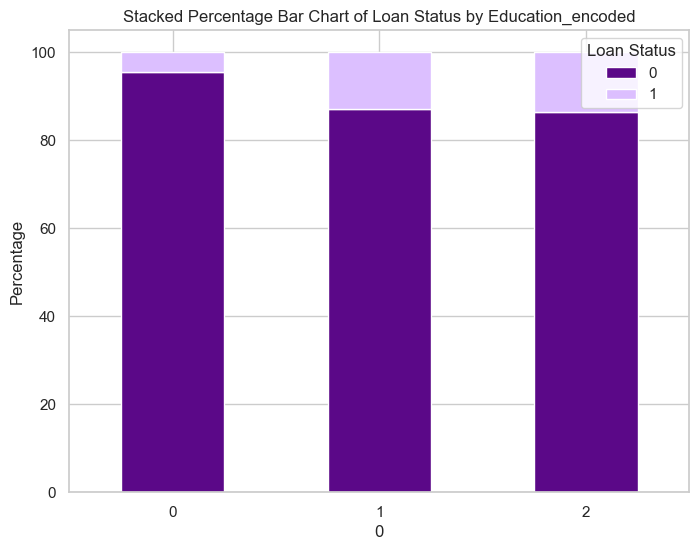

In [144]:
bin_var = ['Education_encoded']
colors = ['#5B0888', '#DCBFFF']

contingency_tables = {}

for i in range(len(bin_var)):
    var1 = bin_var[i]

    # Create a contingency table using the crosstab function
    contingency_table = pd.crosstab(df2[var1], df['Personal Loan'])

    # Store the contingency table in the dictionary
    contingency_tables[f'{var1}_vs_Personal Loan'] = contingency_table

    print(f'Contingency Table for {var1}_vs_Personal Loan: \n{contingency_table}\n')

    # Convert counts to percentages
    contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

    # Plot the stacked percentage bar chart
    ax = contingency_table_percentage.plot(kind='bar', rot=0, figsize=(8, 6), color=colors, stacked=True)
    plt.xlabel(i)
    plt.ylabel('Percentage')
    plt.title(f'Stacked Percentage Bar Chart of Loan Status by {var1}')
    plt.legend(title='Loan Status')
    plt.show()

In [145]:
df2['Age'].describe()

count    4998.000000
mean       45.337935
std        11.465397
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

##### Correlations

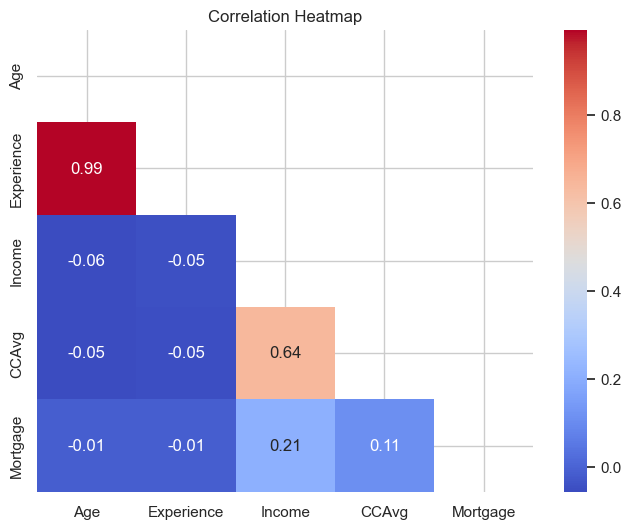

In [146]:
corr_matrix = df[num_var].corr()

# Create a heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Correlation Heatmap')
plt.show()


multicollinearity exists.

##### Cramér's V correlation for categorical variables

In [147]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

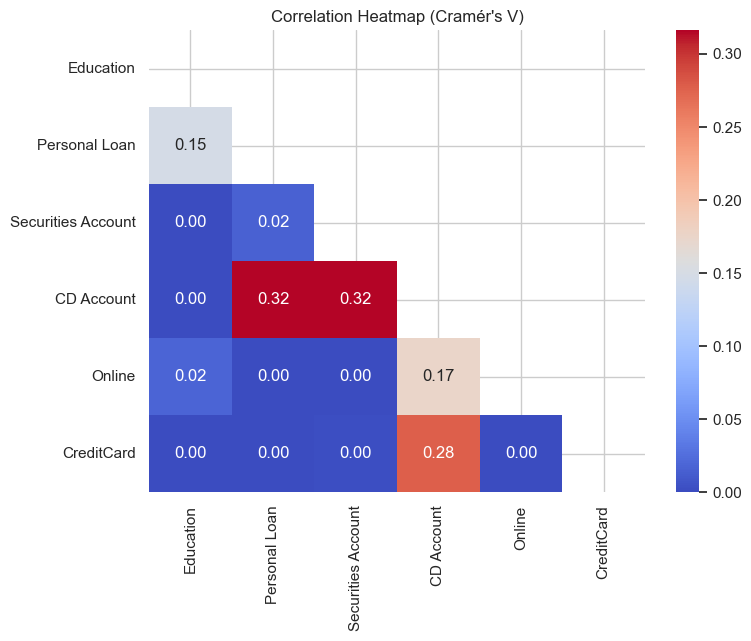

In [148]:
categorical_var = ['Education','Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']
cat_df = df[categorical_var]
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

corr_matrix = pd.DataFrame(index=cat_df.columns, columns=cat_df.columns, dtype=float)
for i in cat_df.columns:
    for j in cat_df.columns:
        corr_matrix.loc[i, j] = cramers_v(cat_df[i], cat_df[j])

# Create a heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f" , mask=mask)
plt.title('Correlation Heatmap (Cramér\'s V)')
plt.show()


##### Correlation between categorical response and the numerical variables

In [149]:
# Assumption(H0) is that FuelType and CarPrices are NOT correlated
for i in num_var:
    CategoryGroupLists=df.groupby('Personal Loan')[i].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)
    print(f'P-Value for Anova between Loan status and {i} is: ', AnovaResults[1])

P-Value for Anova between Loan status and Age is:  0.5856666043891097
P-Value for Anova between Loan status and Experience is:  0.6016365891193135
P-Value for Anova between Loan status and Income is:  3.4758e-320
P-Value for Anova between Loan status and CCAvg is:  6.530812958482504e-160
P-Value for Anova between Loan status and Mortgage is:  6.114873305884796e-24


In [150]:
# p>0.05 for Age and Experience.
#Therefiore they have high correlation with Loan status

##### PCA

In [151]:
df2.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Mortgage', 'Personal Loan', 'Securities Account_0',
       'Securities Account_1', 'CD Account_0', 'CD Account_1', 'Online_0',
       'Online_1', 'CreditCard_0', 'CreditCard_1', 'Education_encoded'],
      dtype='object')

In [152]:
df2 = df2.drop(['ID','ZIP Code'], axis = 1)
df2.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage',
       'Personal Loan', 'Securities Account_0', 'Securities Account_1',
       'CD Account_0', 'CD Account_1', 'Online_0', 'Online_1', 'CreditCard_0',
       'CreditCard_1', 'Education_encoded'],
      dtype='object')

In [153]:
#removed zip code also

In [154]:
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)
df_standardized.head(5)

Age  Experience    Income    Family     CCAvg  Mortgage  \
0 -1.774031   -1.676010 -0.537944  1.397030 -0.192546 -0.555669   
1 -0.029477   -0.099302 -0.864429  0.525760 -0.249844 -0.555669   
2 -0.552843   -0.449682 -1.365039 -1.216779 -0.536333 -0.555669   
3 -0.901754   -0.975251  0.572104 -1.216779  0.437730 -0.555669   
4 -0.901754   -1.062846 -0.625007  1.397030 -0.536333 -0.555669   

   Personal Loan  Securities Account_0  Securities Account_1  CD Account_0  \
0      -0.325947             -2.928261              2.928261      0.253147   
1      -0.325947             -2.928261              2.928261      0.253147   
2      -0.325947              0.341500             -0.341500      0.253147   
3      -0.325947              0.341500             -0.341500      0.253147   
4      -0.325947              0.341500             -0.341500      0.253147   

   CD Account_1  Online_0  Online_1  CreditCard_0  CreditCard_1  \
0     -0.253147   1.21621  -1.21621      0.645186     -0.645186   
1     -0.253147   1.21621  -1.21621      0.645186     -0.645186   
2     -0.253147   1.21621  -1.21621      0.645186     -0.645186   
3     -0.253147   1.21621  -1.21621      0.645186     -0.645186   
4     -0.253147   1.21621  -1.21621     -1.549940      1.549940   

   Education_encoded  
0          -1.049519  
1          -1.049519  
2          -1.049519  
3           0.141286  
4           0.141286

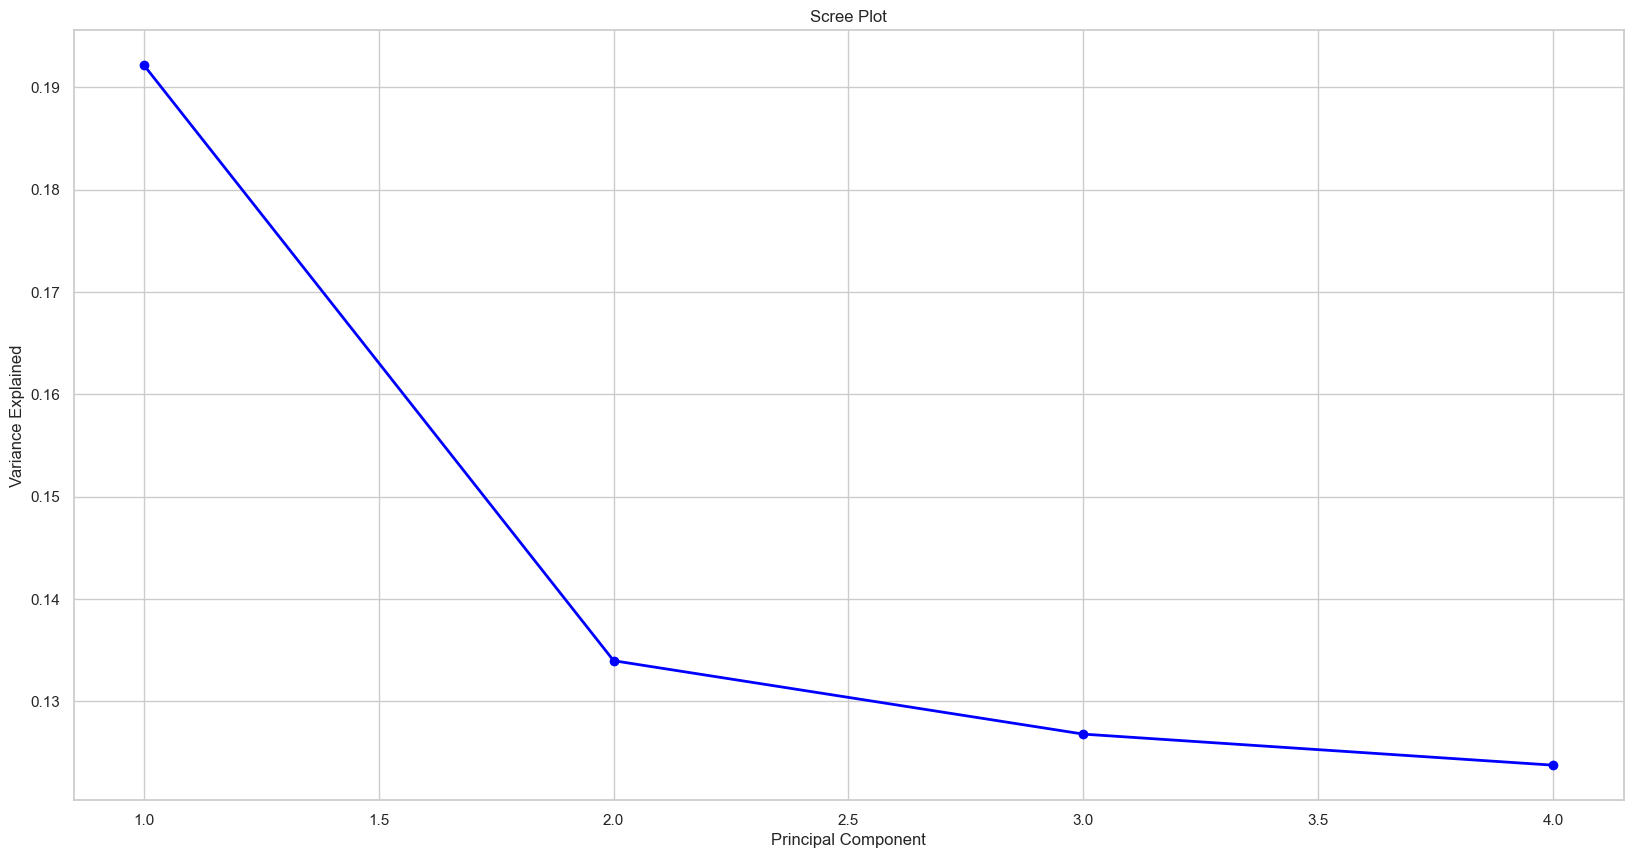

In [155]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca_fit = pca.fit(df_standardized)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [156]:
pca = PCA(n_components=2)
pca.fit(df_standardized)
transformed_data = pca.transform(df_standardized)
explained_variance_ratio = pca.explained_variance_ratio_
print("Transformed Data:")
print(transformed_data)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)


Transformed Data:
[[ 0.50872012  1.00889275]
 [ 0.41265394 -0.37408805]
 [-1.68292241  0.33168335]
 ...
 [-1.76330044 -1.63072337]
 [-0.90245901 -2.05817147]
 [ 0.43001872 -0.0915838 ]]

Explained Variance Ratio:
[0.19216696 0.13397174]


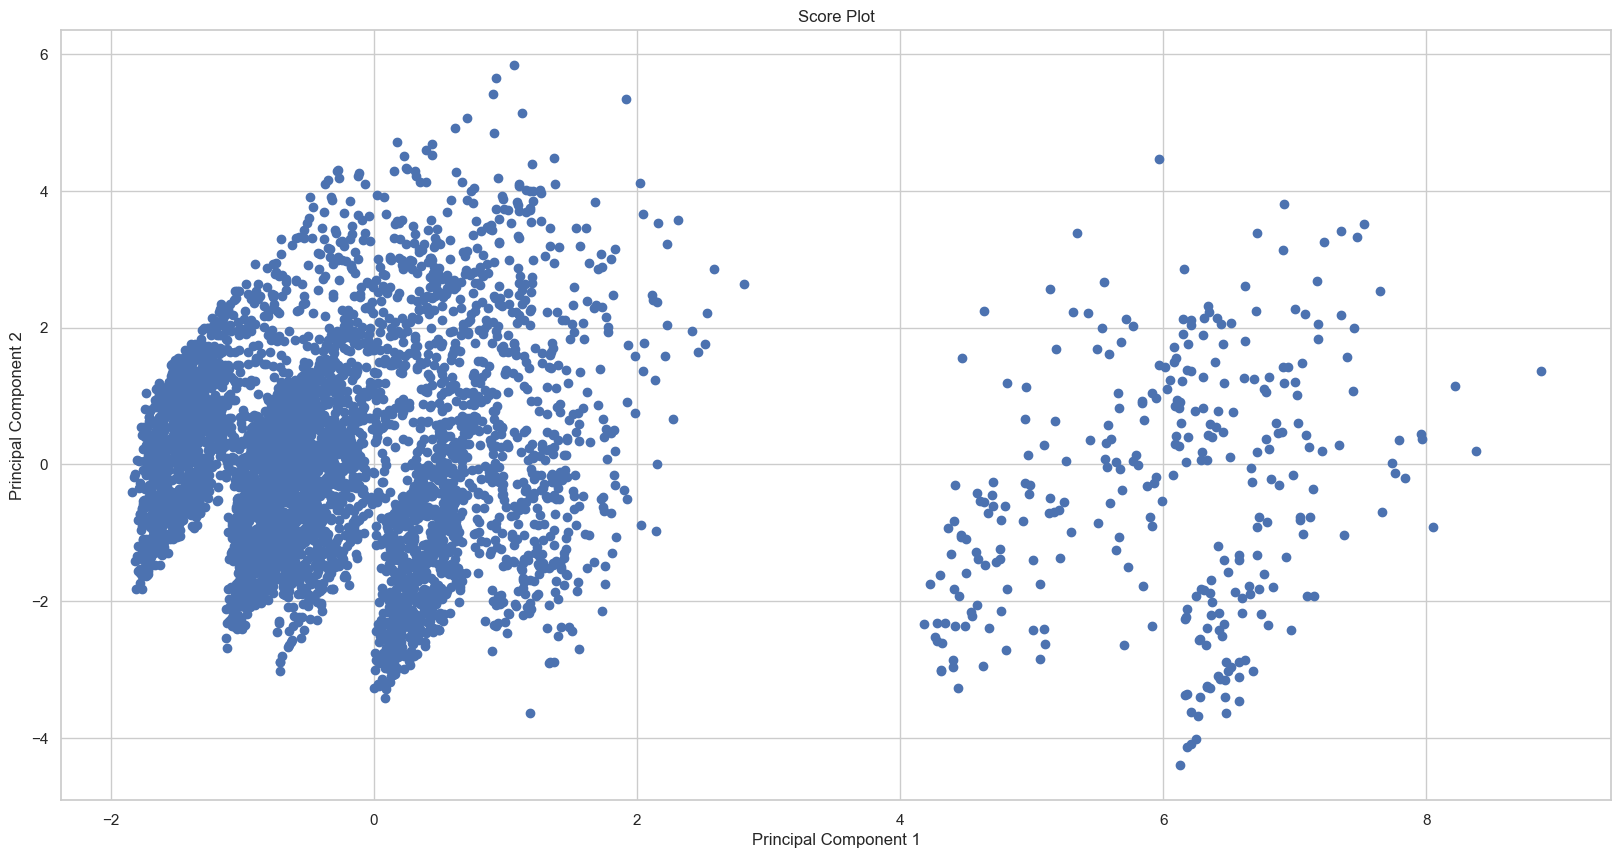

In [157]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Score Plot')
plt.show()

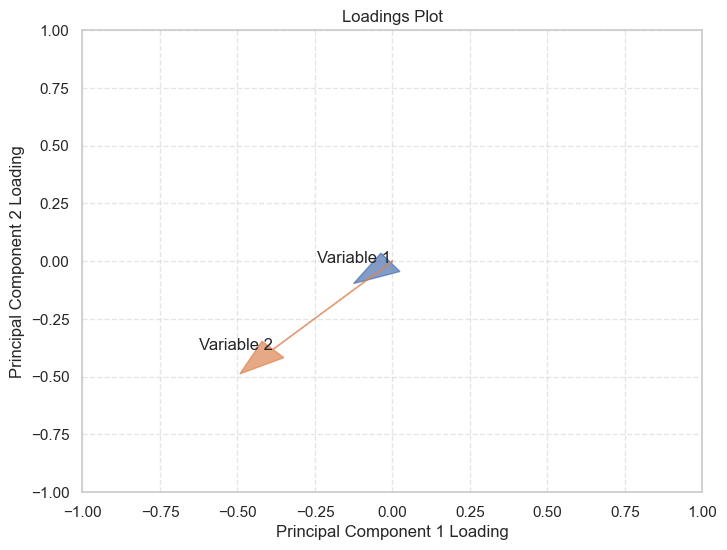

In [158]:
loadings = pca.components_
plt.figure(figsize=(8, 6))

for i, (loading, variable) in enumerate(zip(loadings, range(1, len(loadings[0]) + 1))):
    plt.arrow(0, 0, loading[0], loading[1], color=f'C{i}', alpha=0.7, head_width=0.1)
    plt.text(loading[0], loading[1], f'Variable {variable}', fontsize=12, ha='right')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('Principal Component 1 Loading')
plt.ylabel('Principal Component 2 Loading')
plt.title('Loadings Plot')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [159]:
df_standardized.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage',
       'Personal Loan', 'Securities Account_0', 'Securities Account_1',
       'CD Account_0', 'CD Account_1', 'Online_0', 'Online_1', 'CreditCard_0',
       'CreditCard_1', 'Education_encoded'],
      dtype='object')

In [160]:
loadings = pca.components_
n_features = pca.n_features_in_
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
feature_names= ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage',
       'Personal Loan', 'Securities Account_0', 'Securities Account_1',
       'CD Account_0', 'CD Account_1', 'Online_0', 'Online_1', 'CreditCard_0',
       'CreditCard_1', 'Education_encoded']

pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

PC1       PC2
feature_names                           
Age                  -0.006536 -0.385603
Experience           -0.005055 -0.382193
Income                0.208370  0.451864
Family               -0.001979 -0.073216
CCAvg                 0.181317  0.417693
Mortgage              0.086627  0.172566
Personal Loan         0.247416  0.313693
Securities Account_0 -0.297875  0.089967
Securities Account_1  0.297875 -0.089967
CD Account_0         -0.496651  0.042776
CD Account_1          0.496651 -0.042776
Online_0             -0.174079  0.166982
Online_1              0.174079 -0.166982
CreditCard_0         -0.248229  0.230837
CreditCard_1          0.248229 -0.230837
Education_encoded    -0.017039 -0.104224

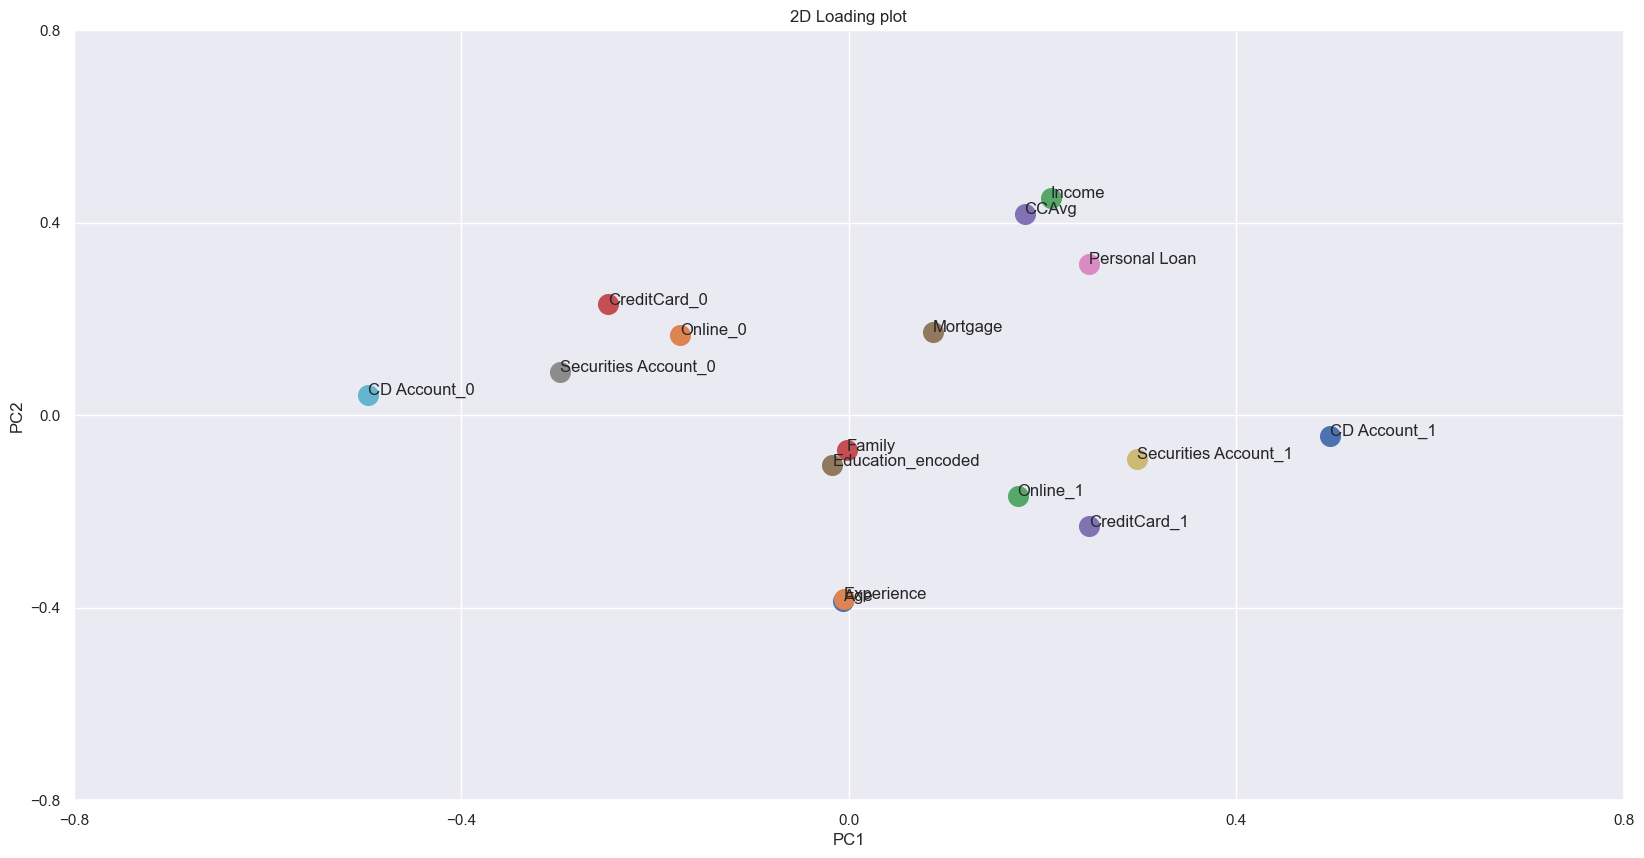

In [161]:
sns.set()

xs = loadings[0]
ys = loadings[1]
 
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.text(xs[i], ys[i], varnames)
 
# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('2D Loading plot')
plt.show()

###### PLSR

In [162]:
X = df_standardized.drop('Personal Loan', axis = 1)
y = df_standardized[['Personal Loan']]
y.head(5)

Personal Loan
0      -0.325947
1      -0.325947
2      -0.325947
3      -0.325947
4      -0.325947

C:\Users\Isini\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:96: RuntimeWarning:

invalid value encountered in divide

C:\Users\Isini\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:320: RuntimeWarning:

invalid value encountered in divide

C:\Users\Isini\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:329: RuntimeWarning:

invalid value encountered in divide

C:\Users\Isini\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Isini\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\Isini\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  F

Text(0.5, 1.0, 'hp')

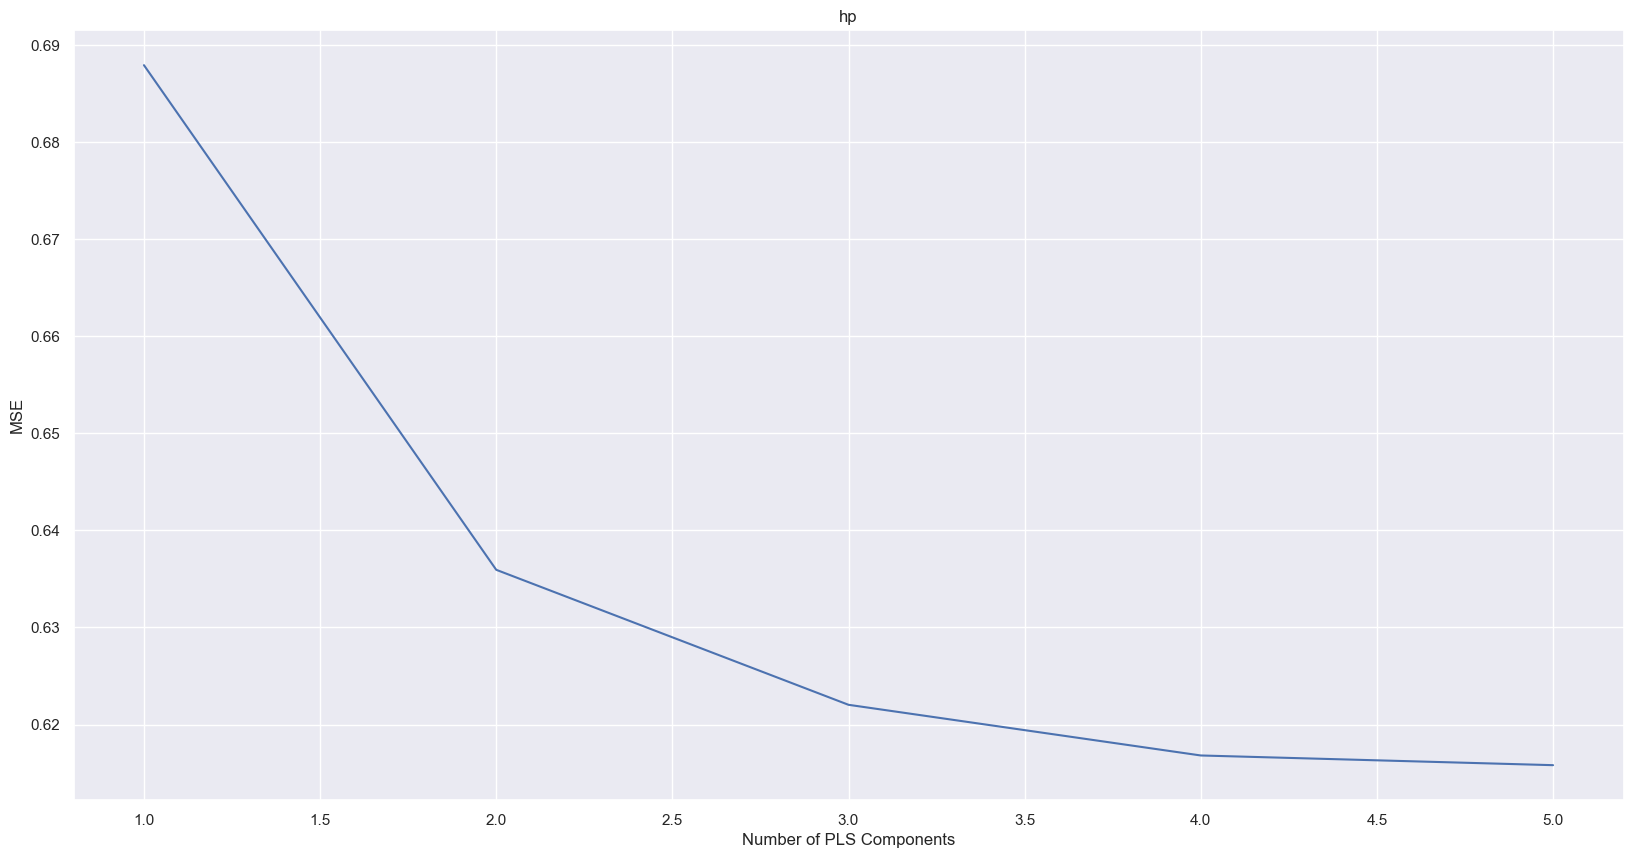

In [163]:
#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = len(X)

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('hp')

###### Splitting the dataset

In [164]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1) 

In [165]:
#calculate RMSE
pls = PLSRegression(n_components=2)
pls.fit(X_train, y_train)

np.sqrt(mean_squared_error(y_test, pls.predict(X_test)))

0.8089068535266839

In [166]:
x=pls.x_scores_[:,0]
y=pls.x_scores_[:,1]
scores = pd. DataFrame(pls.x_scores_, columns=['x', 'y'])
z=y_train
#scores_with_status=pd.concat([scores,z], axis=1)
df_scores=pd.concat([scores.reset_index(drop=True),z.reset_index(drop=True)], axis=1)

In [167]:
df_scores.head(5)

x         y  Personal Loan
0 -1.212057 -0.775890      -0.325947
1 -1.064217 -0.025095      -0.325947
2  0.662175 -0.818190      -0.325947
3  0.119339  1.332812      -0.325947
4 -0.460027 -0.183452      -0.325947

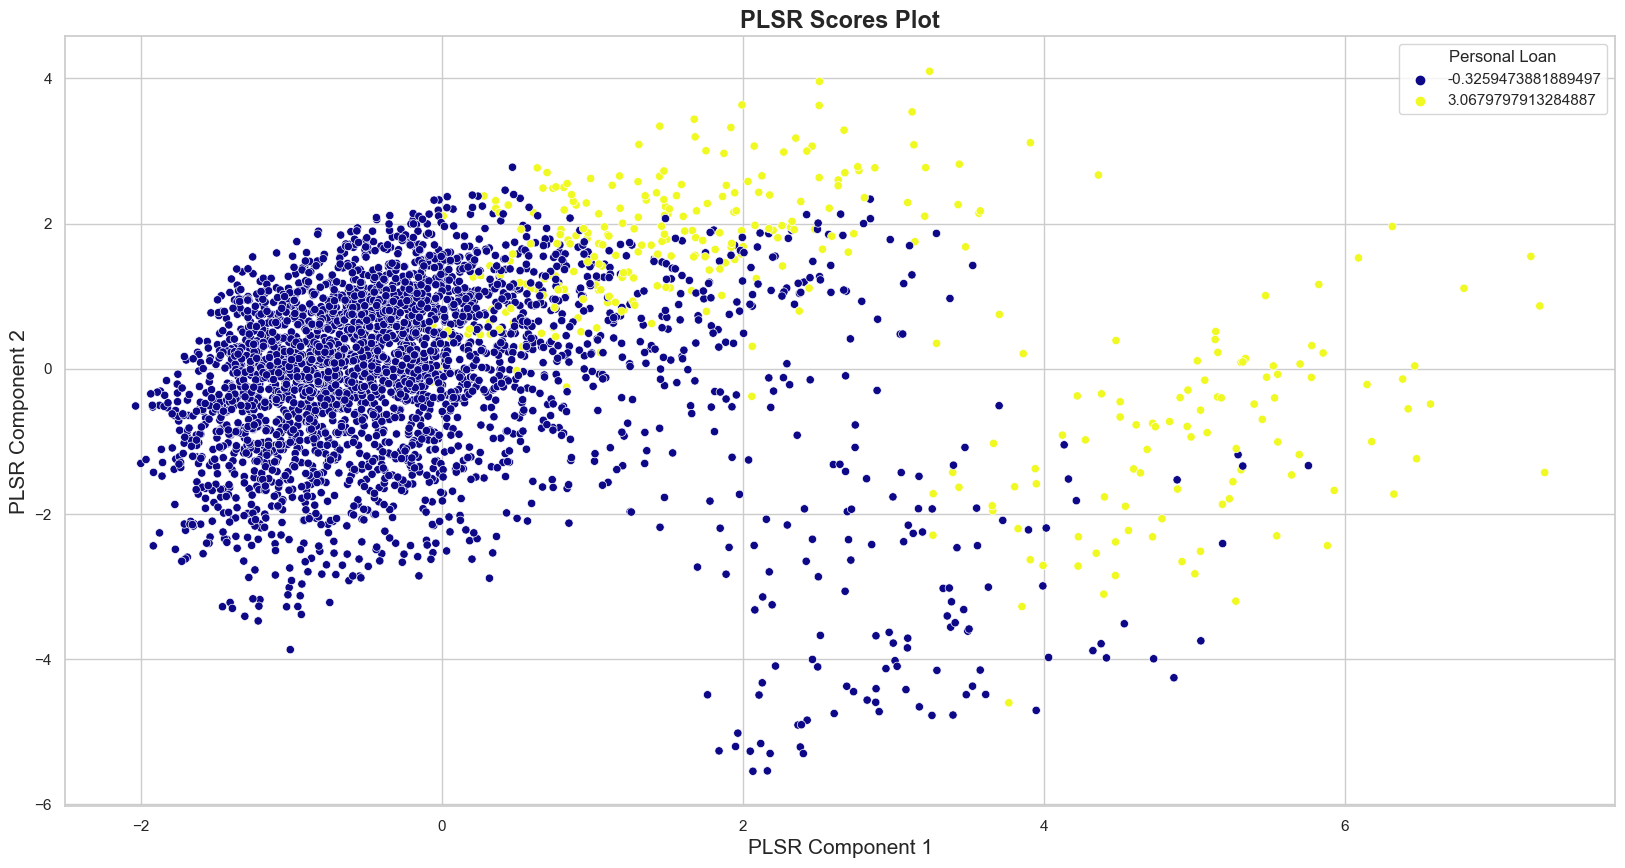

In [168]:
sns.set(style='whitegrid')
fmri = sns.load_dataset("fmri")
 
chart=sns.scatterplot(x="x",
                    y="y",
                    hue="Personal Loan",
                    palette='plasma',
                    data=df_scores)
chart.set_title('PLSR Scores Plot', fontdict={'size': 17, 'weight': 'bold'})
chart.set_xlabel('PLSR Component 1', fontdict={'size': 15})
chart.set_ylabel('PLSR Component 2', fontdict={'size': 15})
plt.savefig('scores.png',dpi=300)
plt.show()

In [169]:
loadings = pls.x_loadings_
loadings1= pls.y_loadings_

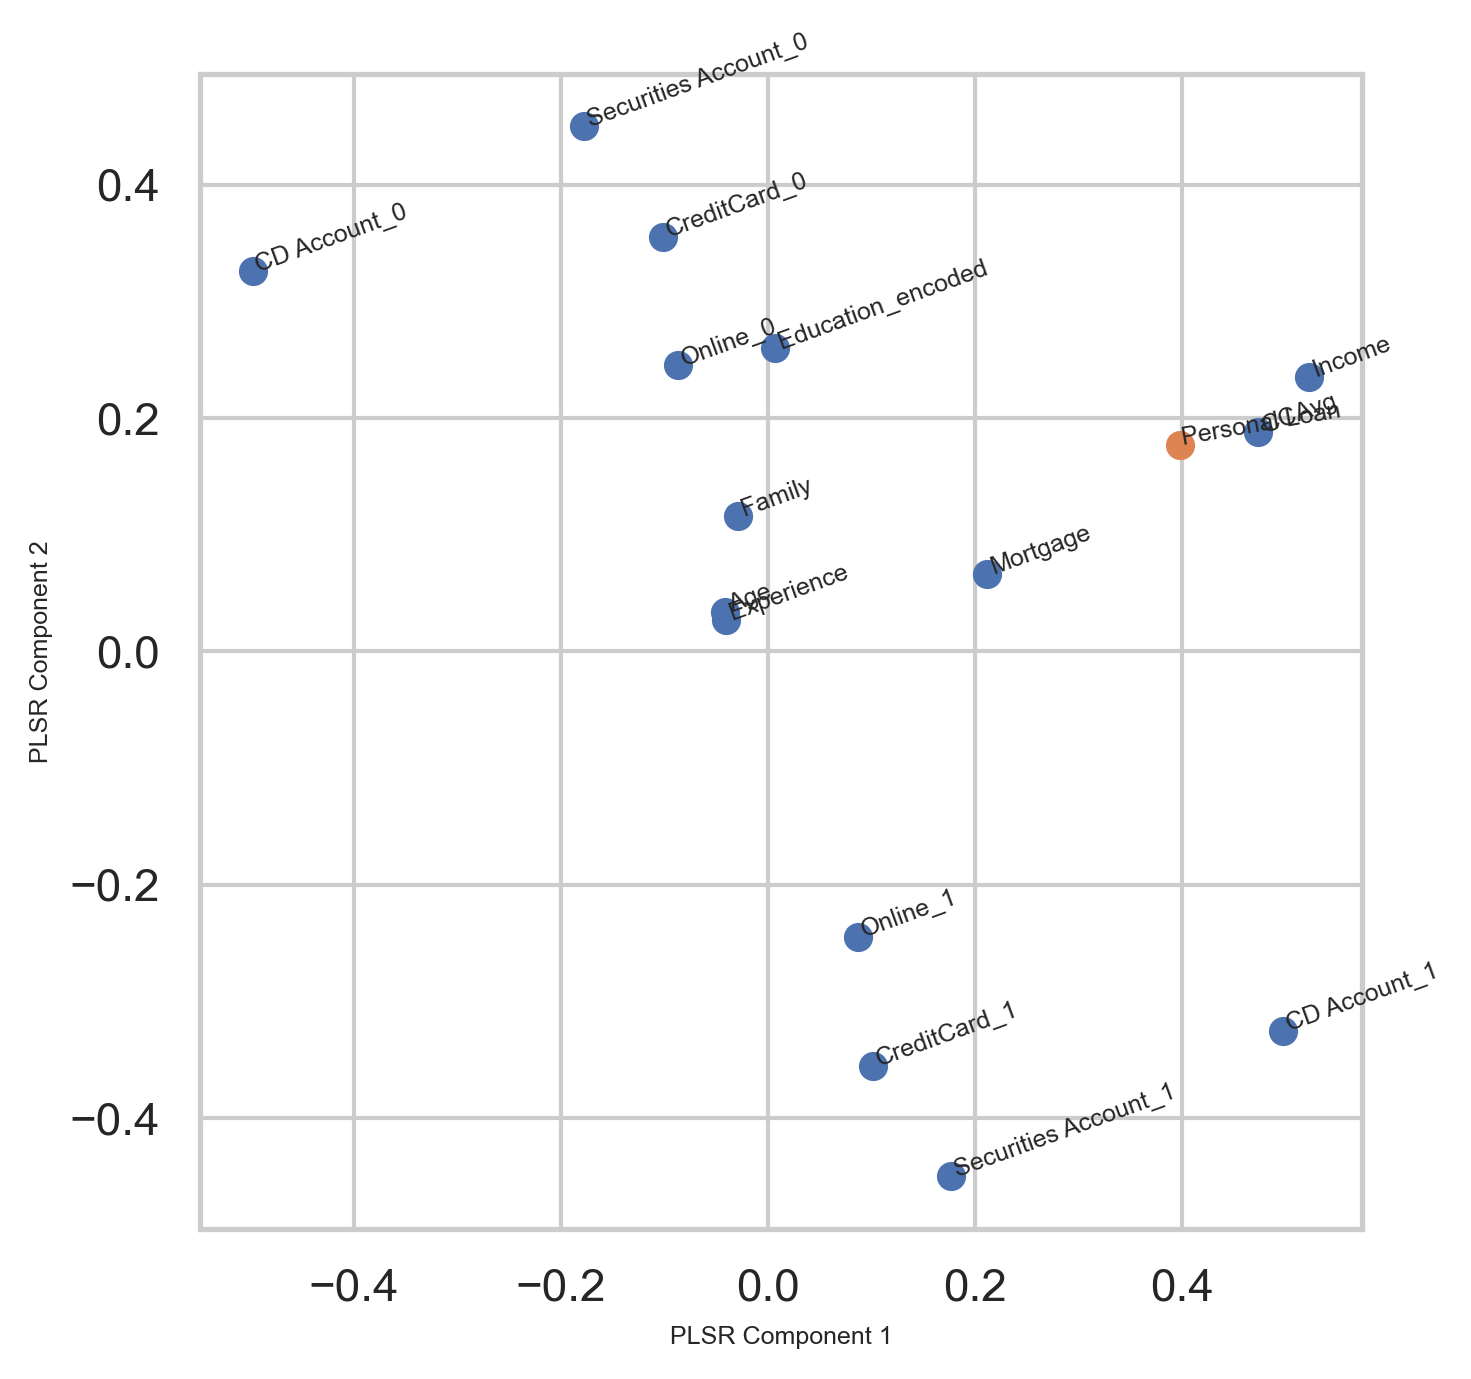

In [170]:
plt.figure(figsize=(5,5),dpi=300)
plt.rcParams.update({'font.size': 6})
plt.scatter(loadings[:, 0], loadings[:, 1])
plt.scatter(loadings1[:, 0], loadings1[:, 1])
for i, feature_name in enumerate(X_train.columns):
    plt.annotate(feature_name, (loadings[i, 0], loadings[i, 1]),rotation=20)
for i, feature_name in enumerate(y_train.columns):
    plt.annotate(feature_name, (loadings1[i, 0], loadings1[i, 1]),rotation=10)    
plt.xlabel('PLSR Component 1')
plt.ylabel('PLSR Component 2')
plt.savefig('loadings.png',dpi=300,bbox_inches='tight')
plt.show()

In [171]:
#get the scores of the first two components
scores = pls.x_scores_[:,:2]

# calculate the total variance of the input data
total_variance = np.var(X_train, axis=0).sum()

# calculate the total variance of the scores
scores_variance = np.var(scores, axis=0).sum()
scores_variance

#calculate the proportion of variance explained by the first two components
variance_explained = scores_variance/ total_variance

variance_explained*100

25.14043374507852

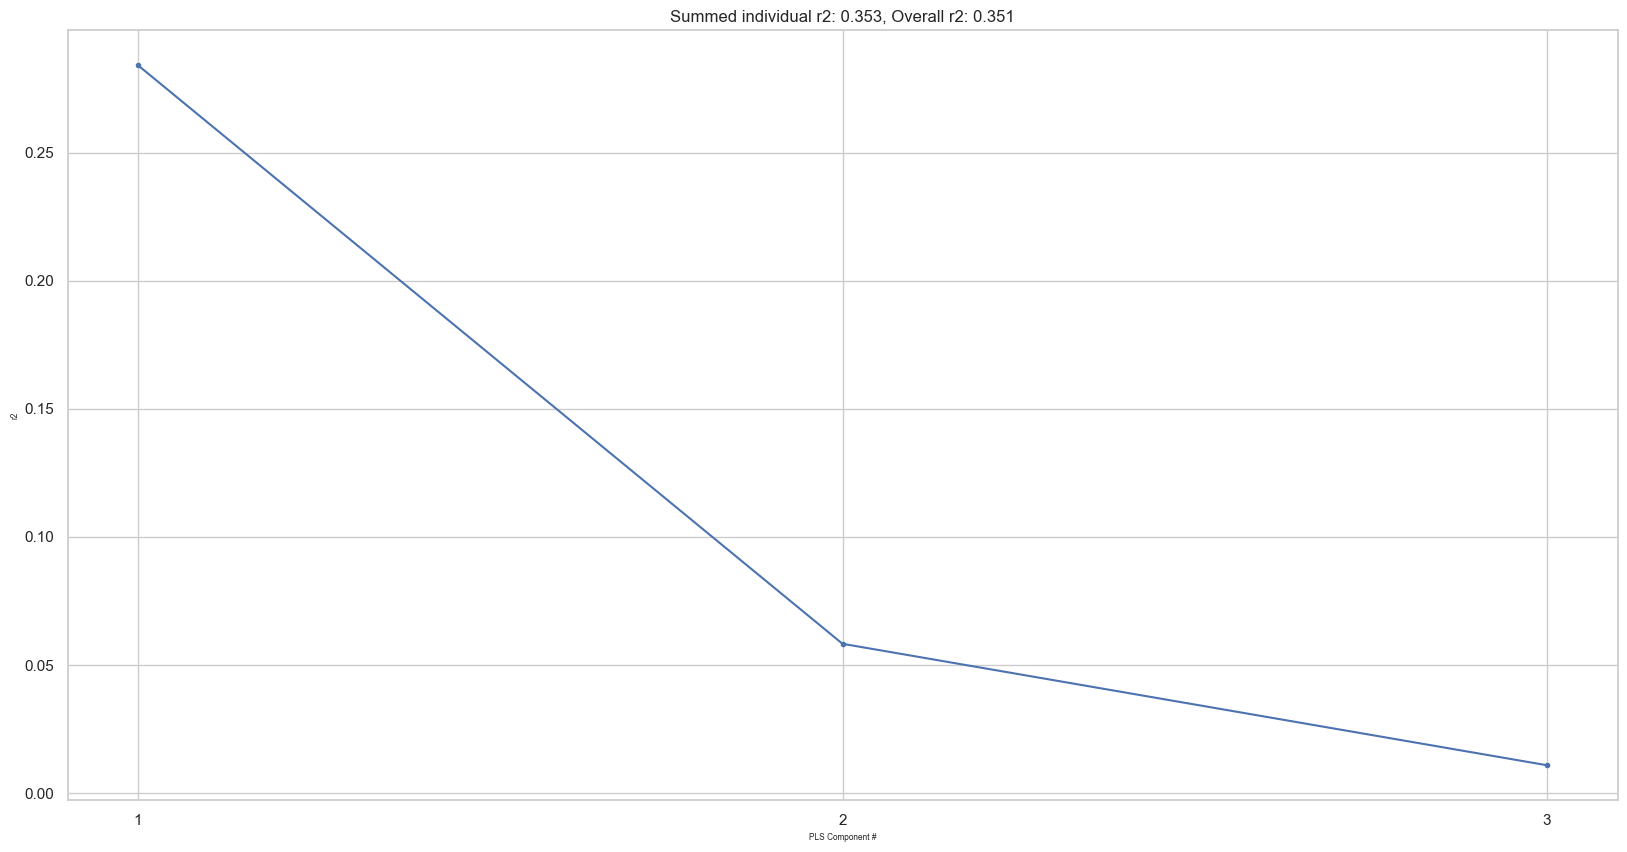

(array([0.28407348, 0.0582688 , 0.01085981]), 0.350992585616797)

In [172]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score

def pls_explained_variance(pls, X, Y_true, do_plot=True):
    r2 = np.zeros(pls.n_components)
    x_transformed = pls.transform(X) # Project X into low dimensional basis
    for i in range(0, pls.n_components):
        Y_pred = (np.dot(x_transformed[:, i][:, np.newaxis],
                         pls.y_loadings_[:, i][:, np.newaxis].T) * pls._y_std   
                  + pls._y_mean)
        r2[i] = r2_score(Y_true, Y_pred)
        overall_r2 = r2_score(Y_true, pls.predict(X))  # Use all components together.

    if do_plot:
        component = np.arange(pls.n_components) + 1
        plt.plot(component, r2, '.-')
        plt.xticks(component)
        plt.xlabel('PLS Component #'), plt.ylabel('r2')
        plt.title(f'Summed individual r2: {np.sum(r2):.3f}, '
                  f'Overall r2: {overall_r2:.3f}')
        plt.show()

    return r2, overall_r2

# Example usage.
pls = PLSRegression(n_components=3).fit(X_train, y_train)
pls_explained_variance(pls, X_test, y_test)

# Advanced Analysis

In [173]:
from sklearn.model_selection import StratifiedShuffleSplit

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier, plot_importance

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

from sklearn.inspection import PartialDependenceDisplay

In [174]:
#pip install pdpbox

##### Stratified Shuffle split for keeping the percentage of each class constant

 in situations where some classes are underrepresented. If the class distribution is not preserved during the split, you might end up with a training set that doesn't adequately represent the diversity of the original dataset, leading to biased model training and potentially poor generalization to unseen data.

In [175]:
X = df2.drop('Personal Loan', axis = 1)
y = df2[['Personal Loan']]

# Set the number of splits (you can adjust this)
n_splits = 1

# Initialize StratifiedShuffleSplit
stratified_splitter = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)

# Perform the split
for train_index, test_index in stratified_splitter.split(X, y):
    trainx, testx = X.iloc[train_index], X.iloc[test_index]
    trainy, testy = y.iloc[train_index], y.iloc[test_index]

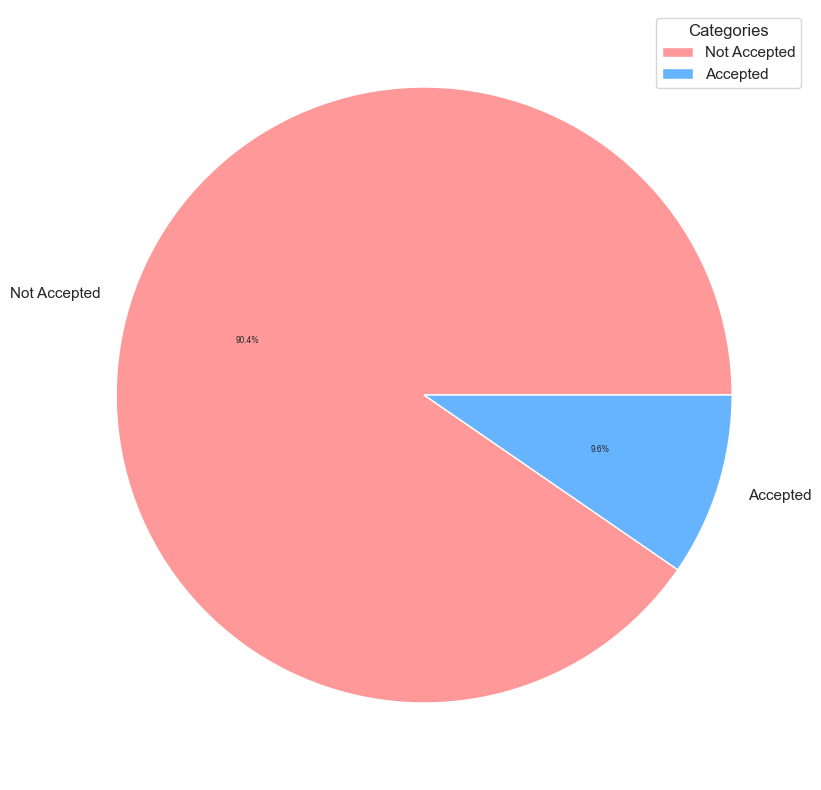

0    904
1     96
Name: Personal Loan, dtype: int64

In [176]:
counts = testy['Personal Loan'].value_counts()


custom_colors = ["#FF9999", "#66B3FF"]
plt.pie(counts, labels=['Not Accepted','Accepted'], colors=custom_colors, autopct='%1.1f%%')
plt.legend(title='Categories', labels=['Not Accepted','Accepted'])
plt.show()


testy['Personal Loan'].value_counts()

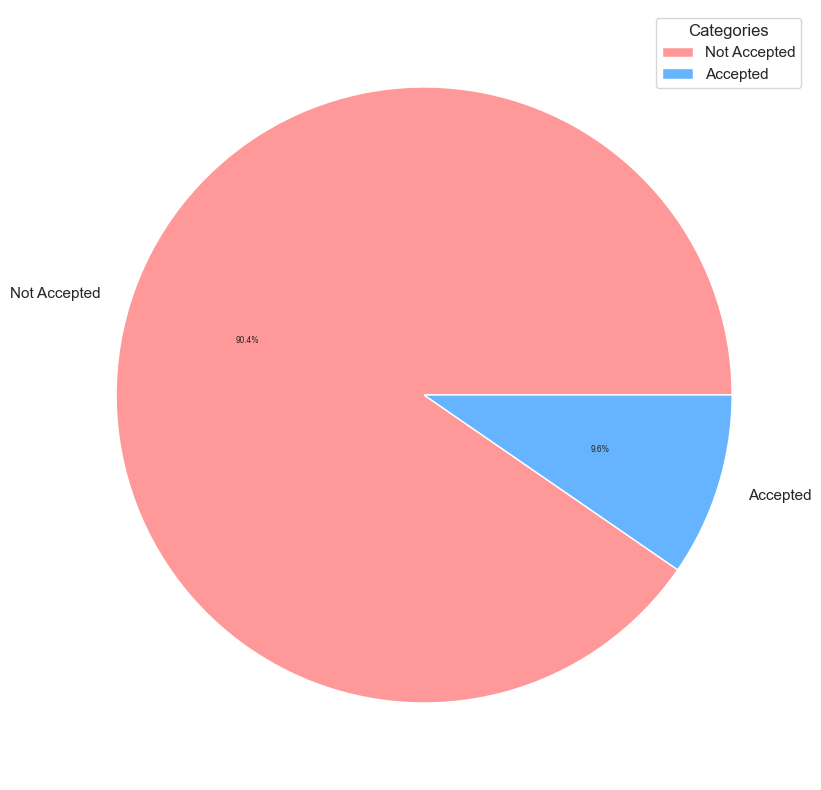

0    3614
1     384
Name: Personal Loan, dtype: int64

In [177]:
counts = trainy['Personal Loan'].value_counts()


custom_colors = ["#FF9999", "#66B3FF"]
plt.pie(counts, labels=['Not Accepted','Accepted'], colors=custom_colors, autopct='%1.1f%%')
plt.legend(title='Categories', labels=['Not Accepted','Accepted'])
plt.show()


trainy['Personal Loan'].value_counts()

#### SMOTE

In [178]:
oversample = SMOTE(random_state=0)
smote_x , smote_y = oversample.fit_resample(trainx , trainy)

# Display the class distribution after SMOTE
print(smote_y.value_counts())

Personal Loan
0                3614
1                3614
dtype: int64


### 1. Logistic Ridge Regression

##### 1. without resampling

In [179]:
lridge_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')

# Fit the model to the training data
lridge_model.fit(trainx, trainy)

# Make predictions on the test data
lridge_pred = lridge_model.predict(testx)

# Classification report
print("Classification Report (test set):")
print(classification_report(testy, lridge_pred))

Classification Report (test set):
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       904
           1       0.81      0.67      0.73        96

    accuracy                           0.95      1000
   macro avg       0.89      0.83      0.85      1000
weighted avg       0.95      0.95      0.95      1000



C:\Users\Isini\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [199]:
lridge_trainpred = lridge_model.predict(trainx)

# Classification report
print("Classification Report (test set):")
print(classification_report(trainy, lridge_trainpred))

Classification Report (test set):
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      3614
           1       0.62      0.79      0.69       384

    accuracy                           0.93      3998
   macro avg       0.80      0.87      0.83      3998
weighted avg       0.94      0.93      0.94      3998



##### 2. with SMOTE

In [180]:
lridge_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')

# Fit the model to the training data
lridge_model.fit(smote_x, smote_y)

# Make predictions on the test data
lridge_pred_smote = lridge_model.predict(testx)

# Classification report
print("Classification Report (test set):")
print(classification_report(testy, lridge_pred_smote))

Classification Report (test set):
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       904
           1       0.62      0.81      0.71        96

    accuracy                           0.94      1000
   macro avg       0.80      0.88      0.83      1000
weighted avg       0.95      0.94      0.94      1000



C:\Users\Isini\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [181]:
print("Classification Report (train set):")
print(classification_report(testy, lridge_pred_smote))

Classification Report (train set):
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       904
           1       0.62      0.81      0.71        96

    accuracy                           0.94      1000
   macro avg       0.80      0.88      0.83      1000
weighted avg       0.95      0.94      0.94      1000



### 2. Naive Bayes

##### 1. without resampling

In [182]:
NB_model = GaussianNB()

# Create a Multinomial Naive Bayes Classifier (for discrete data)
# model = MultinomialNB()

# Fit the model to the training data
NB_model.fit(trainx, trainy)

# Make predictions on the test data
NB_pred = NB_model.predict(testx)

# Classification report
print("Classification Report (test set):")
print(classification_report(testy, NB_pred))

C:\Users\Isini\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Classification Report (test set):
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       904
           1       0.42      0.49      0.45        96

    accuracy                           0.89      1000
   macro avg       0.68      0.71      0.69      1000
weighted avg       0.89      0.89      0.89      1000



##### 2. with SMOTE

In [183]:
NB_model = GaussianNB()

# Create a Multinomial Naive Bayes Classifier (for discrete data)
# model = MultinomialNB()

# Fit the model to the training data
NB_model.fit(smote_x, smote_y)

# Make predictions on the test data
NB_pred_smote = NB_model.predict(testx)

# Classification report
print("Classification Report:")
print(classification_report(testy, NB_pred_smote))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       904
           1       0.39      0.62      0.48        96

    accuracy                           0.87      1000
   macro avg       0.68      0.76      0.71      1000
weighted avg       0.90      0.87      0.88      1000



C:\Users\Isini\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



### 3. XG Boosting

##### 1. without SMOTE (Best)

In [184]:
label_encoder = LabelEncoder()

# Convert string labels to numerical labels
testy_encoded = label_encoder.fit_transform(testy)
trainy_encoded = label_encoder.fit_transform(trainy)

xgb_model = XGBClassifier()

# Train the classifier on the training data
xgb_model.fit(trainx, trainy_encoded)

xgb_pred = xgb_model.predict(testx)

# Classification report
print("Classification Report:")
print(classification_report(testy_encoded, xgb_pred))

C:\Users\Isini\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Isini\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       904
           1       0.96      0.96      0.96        96

    accuracy                           0.99      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.99      0.99      0.99      1000



In [185]:
trainy.dtypes

Personal Loan    int64
dtype: object

In [197]:
xgb_trainpred = xgb_model.predict(trainx)

# Classification report
print("Classification Report:")
print(classification_report(trainy_encoded, xgb_trainpred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3614
           1       1.00      1.00      1.00       384

    accuracy                           1.00      3998
   macro avg       1.00      1.00      1.00      3998
weighted avg       1.00      1.00      1.00      3998



##### 2.with SMOTE

In [187]:
smotey_encoded = label_encoder.fit_transform(smote_y)

xgb_model_smote = XGBClassifier()

# Train the classifier on the training data
xgb_model_smote.fit(smote_x, smotey_encoded)

xgb_pred_smote = xgb_model_smote.predict(testx)

# Classification report
print("Classification Report:")
print(classification_report(testy_encoded, xgb_pred_smote))

C:\Users\Isini\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.92      0.95      0.93        96

    accuracy                           0.99      1000
   macro avg       0.96      0.97      0.96      1000
weighted avg       0.99      0.99      0.99      1000



#### VIP plot

<Figure size 2000x1000 with 0 Axes>

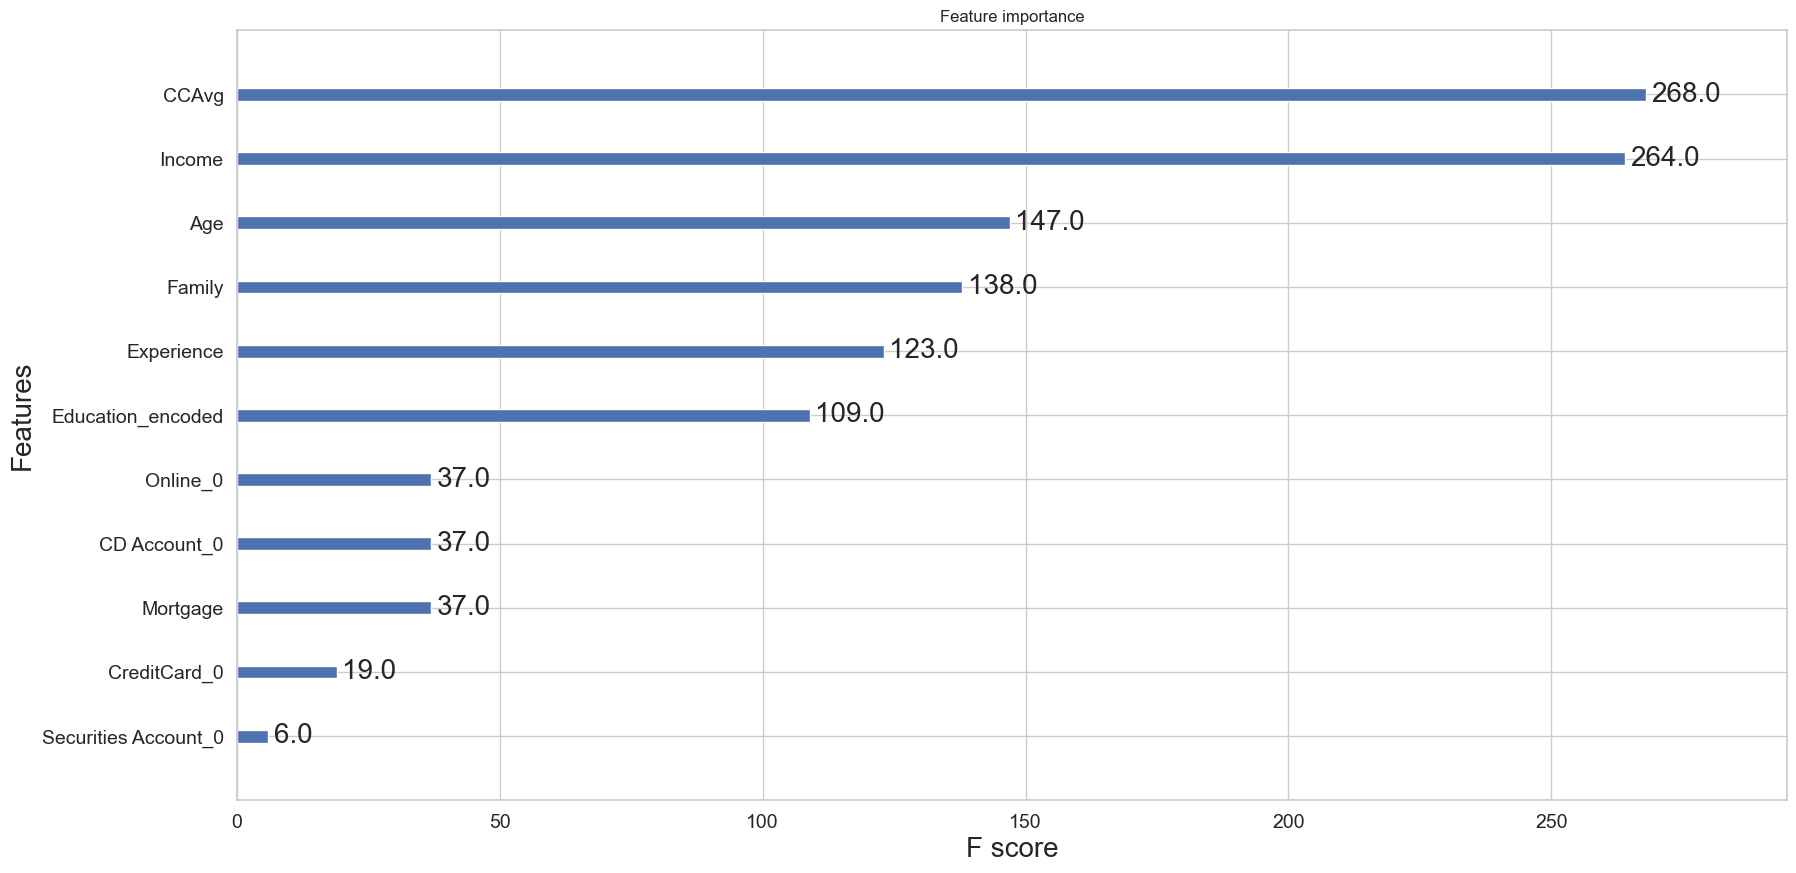

In [200]:
plt.figure(figsize=(20, 10))
plot_importance(xgb_model)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

#### PD plots

In [189]:
features = ['CCAvg','Income','Age','Family','Experience','Education_encoded']

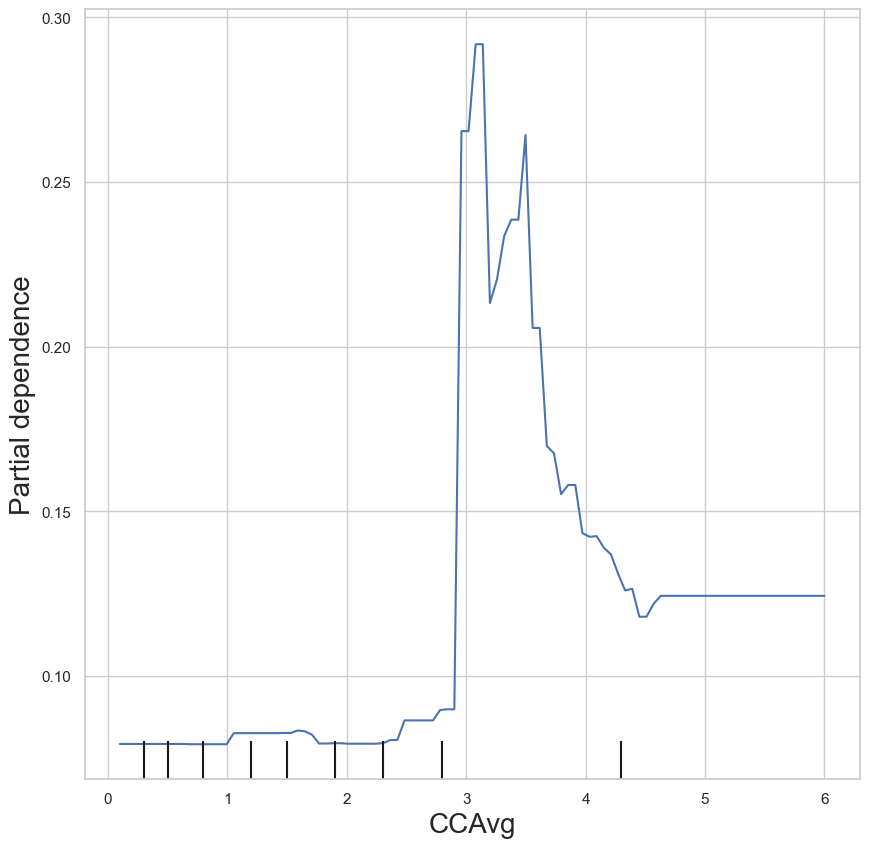

In [190]:
features = ['CCAvg']
fig, ax = plt.subplots(figsize=(10,10))
plt.rc('font', size=20)
one=PartialDependenceDisplay.from_estimator(xgb_model, trainx, features = features,ax=ax)
plt.savefig('0.png',dpi=300)
        

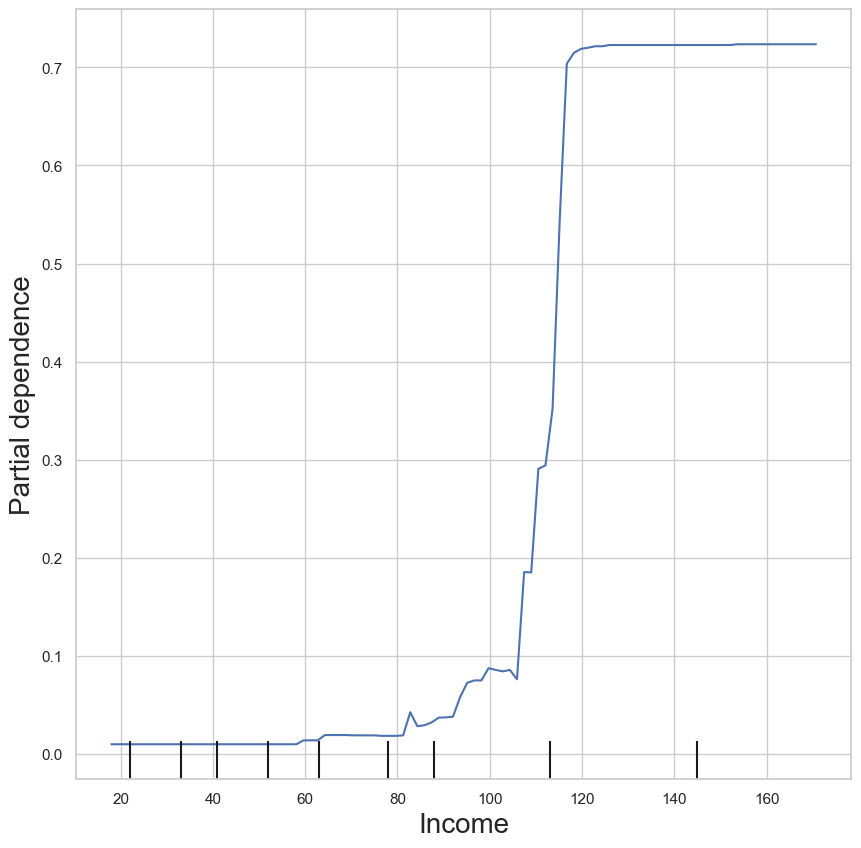

In [191]:
features = ['Income']
fig, ax = plt.subplots(figsize=(10,10))
plt.rc('font', size=20)
one=PartialDependenceDisplay.from_estimator(xgb_model, trainx, features = features,ax=ax)
plt.savefig('0.png',dpi=300)
        

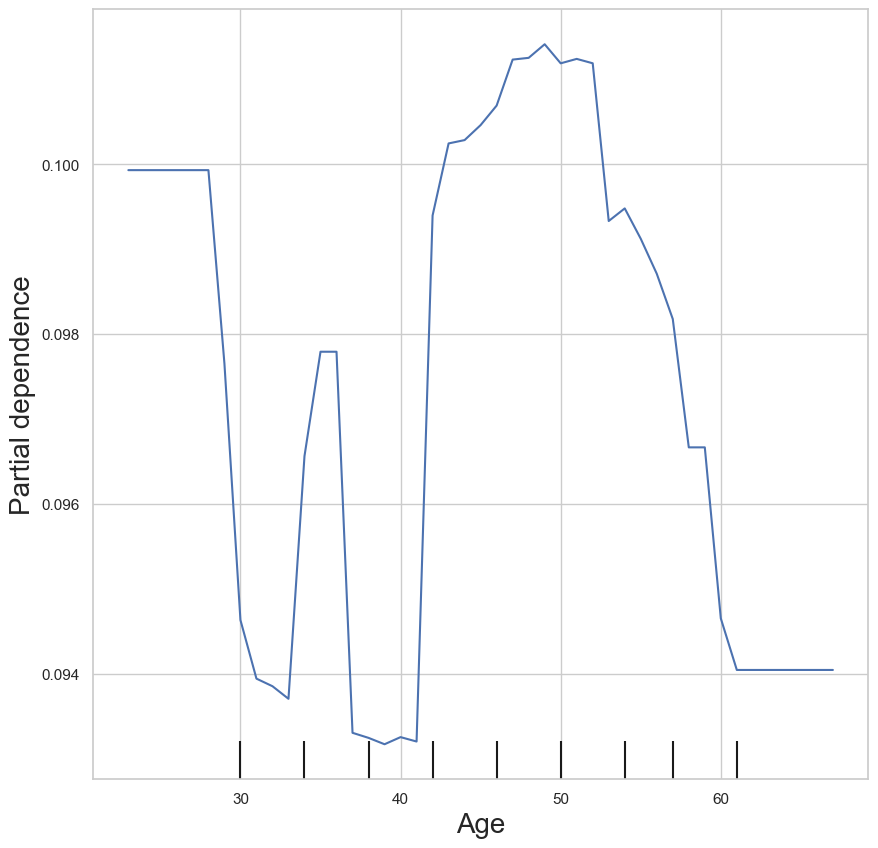

In [192]:
features = ['Age']
fig, ax = plt.subplots(figsize=(10,10))
plt.rc('font', size=20)
one=PartialDependenceDisplay.from_estimator(xgb_model, trainx, features = features,ax=ax)
plt.savefig('0.png',dpi=300)

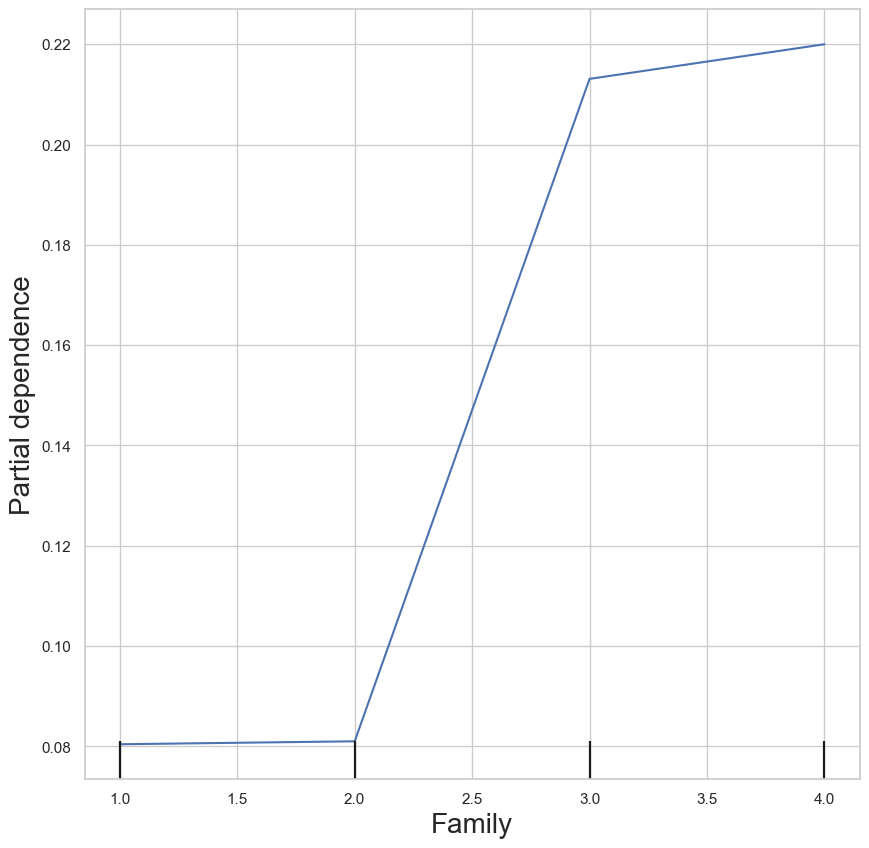

In [193]:
features = ['Family']
fig, ax = plt.subplots(figsize=(10,10))
plt.rc('font', size=20)
one=PartialDependenceDisplay.from_estimator(xgb_model, trainx, features = features,ax=ax)
plt.savefig('0.png',dpi=300)

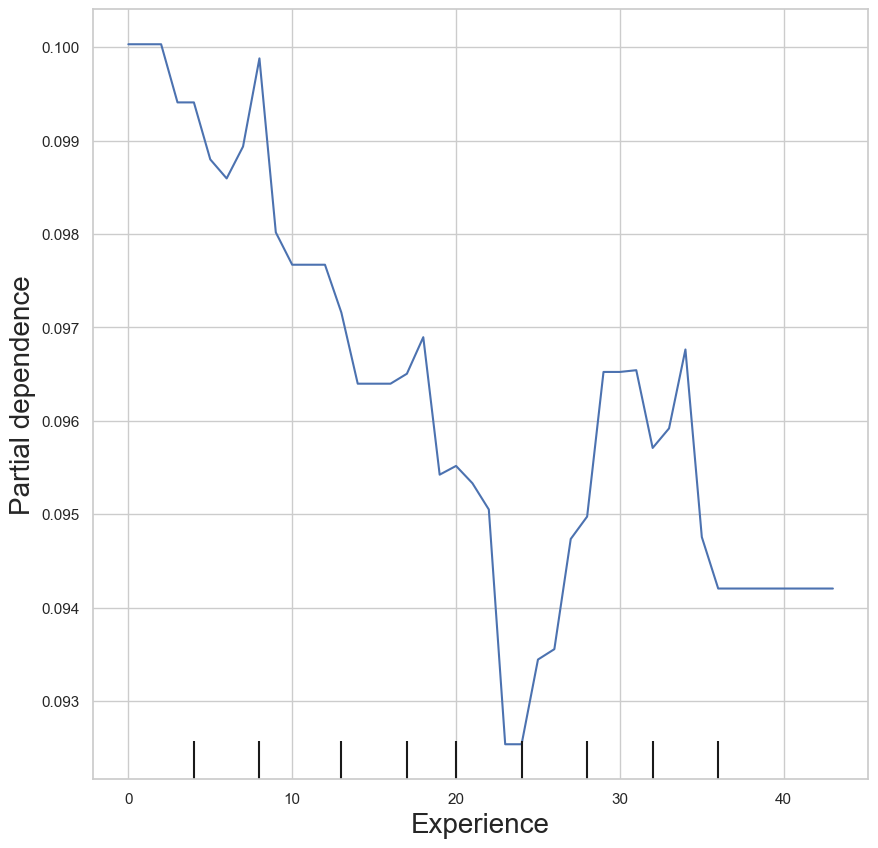

In [194]:
features = ['Experience']
fig, ax = plt.subplots(figsize=(10,10))
plt.rc('font', size=20)
one=PartialDependenceDisplay.from_estimator(xgb_model, trainx, features = features,ax=ax)
plt.savefig('0.png',dpi=300)

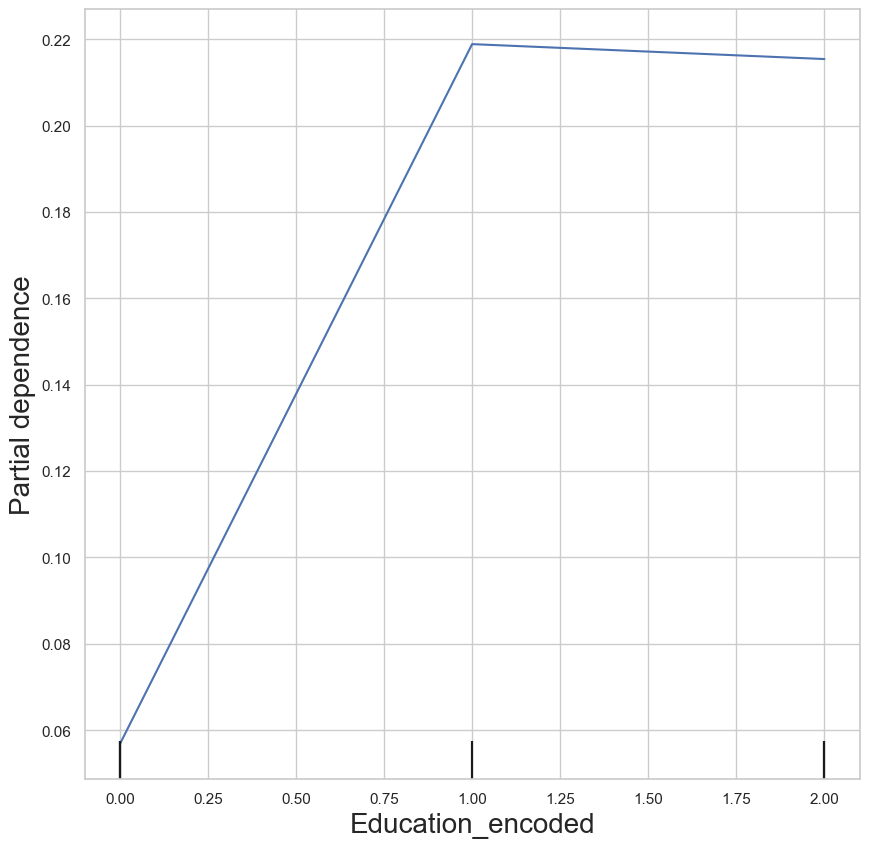

In [195]:
features = ['Education_encoded']
fig, ax = plt.subplots(figsize=(10,10))
plt.rc('font', size=20)
one=PartialDependenceDisplay.from_estimator(xgb_model, trainx, features = features,ax=ax)
plt.savefig('0.png',dpi=300)